# Loading libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200) # this is to set maximum number of rows to be displayed

import warnings
warnings.filterwarnings("ignore")

# loading and exploring the dataset

In [2]:
df = pd.read_csv('used_cars_data.csv',index_col=0) # considering S.No column as index column 
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

#copy data to another dataframe to avoid curruption of original data.
cars4U = df.copy()
#get same random 10 rows everytime.
np.random.seed(1)
cars4U.sample(n=10)

There are 7253 rows and 13 columns.


Name    Location  Year  \
S.No.                                                                
2397              Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3777                      Maruti Wagon R VXI 1.2       Kochi  2015   
4425                      Ford Endeavour 4x2 XLT   Hyderabad  2007   
3661   Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2016   
4514        Hyundai Xcent 1.2 Kappa AT SX Option       Kochi  2016   
599               Toyota Innova Crysta 2.8 ZX AT  Coimbatore  2019   
186    Mercedes-Benz E-Class E250 CDI Avantgrade   Bangalore  2014   
305       Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi  2014   
4582                       Hyundai i20 1.2 Magna     Kolkata  2011   
5434            Honda WR-V Edge Edition i-VTEC S       Kochi  2019   

       Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
S.No.                                                                    
2397               21460    Petrol       Manual      First   17.0 kmpl   
3777               49818    Petrol       Manual      First   21.5 kmpl   
4425              130000    Diesel       Manual      First   13.1 kmpl   
3661               39753    Diesel    Automatic      First   13.0 kmpl   
4514               45560    Petrol    Automatic      First   16.9 kmpl   
599                40674    Diesel    Automatic      First  11.36 kmpl   
186                37382    Diesel    Automatic      First   13.0 kmpl   
305                61726    Diesel    Automatic      First  17.68 kmpl   
4582               36000    Petrol       Manual      First   18.5 kmpl   
5434               13913    Petrol       Manual      First   17.5 kmpl   

        Engine       Power  Seats   New_Price  Price  
S.No.                                                 
2397   1497 CC  121.36 bhp    5.0   9.47 Lakh   6.00  
3777   1197 CC   81.80 bhp    5.0   5.44 Lakh   4.11  
4425   2499 CC     141 bhp    7.0         NaN   6.00  
3661   2143 CC   201.1 bhp    5.0         NaN  35.28  
4514   1197 CC      82 bhp    5.0         NaN   6.34  
599    2755 CC   171.5 bhp    7.0  28.05 Lakh  24.82  
186    2143 CC   201.1 bhp    5.0         NaN  32.00  
305    1968 CC  174.33 bhp    5.0         NaN  20.77  
4582   1197 CC      80 bhp    5.0         NaN   2.50  
5434   1199 CC    88.7 bhp    5.0   9.36 Lakh   8.20

In [3]:
# looking for most missing values column wise
cars4U.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [4]:
# checking info
cars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [5]:
#look for value counts for each column
for col in cars4U.columns:
    print('value count for column {0} is \n {1}'.format(col, cars4U[col].value_counts(dropna=False)))
    print('\n\n')
#cars4U['Fuel_Type'].value_counts(dropna=False)

value count for column Name is 
 Mahindra XUV500 W8 2WD                       55
Maruti Swift VDI                             49
Maruti Swift Dzire VDI                       42
Honda City 1.5 S MT                          39
Maruti Swift VDI BSIV                        37
                                             ..
Chevrolet Enjoy TCDi LS 7 Seater              1
Hyundai Sonata Embera 2.0L CRDi AT            1
Tata Nexon 1.2 Revotron XZ Plus               1
Skoda Laura L and K AT                        1
Nissan Sunny 2011-2014 XV Special Edition     1
Name: Name, Length: 2041, dtype: int64



value count for column Location is 
 Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64



value count for column Year is 
 2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2

# Processing the columns

we have columns ["Mileage","Engine","Power","New_Price"] which has alfanumeric characters. These columns needs to be converted numeric type.

In [6]:
# strikinng off the units for the columns "Mileage","Engine","Power"
cols = ["Mileage","Engine","Power"]
def strip_off_units(i): 
    """function for getting just numeric values from the cell"""
    if isinstance(i,str):
        splt = i.split(' ')
        return splt[0]
    else:
        return np.nan

for col in cols:
    cars4U[col] = cars4U[col].apply(strip_off_units)

cars4U.sample(n=10)


Name   Location  Year  Kilometers_Driven  \
S.No.                                                                         
2245             Maruti Wagon R VXI 1.2     Mumbai  2015              55000   
6407            Maruti Swift LXI Option      Kochi  2017              62889   
1226    Toyota Corolla Altis 1.8 VL CVT      Delhi  2017              21000   
533                 Honda City 1.5 V AT     Mumbai  2010              69000   
6330               Hyundai i20 Asta 1.2    Kolkata  2015              33000   
5931                  Maruti Ertiga VXI     Mumbai  2012              52500   
2784             Nissan Micra Diesel XV  Hyderabad  2011              86732   
5180   Skoda Superb Elegance 1.8 TSI AT  Bangalore  2009              75000   
2722   Volkswagen Ameo 1.5 TDI Highline      Kochi  2018              31426   
5322      Hyundai Grand i10 CRDi Sportz  Ahmedabad  2016              30000   

      Fuel_Type Transmission Owner_Type Mileage Engine   Power  Seats  \
S.No.                                                                   
2245     Petrol       Manual      First    21.5   1197   81.80    5.0   
6407     Petrol       Manual      First    20.4   1197   81.80    5.0   
1226     Petrol    Automatic      First   14.28   1798  138.03    5.0   
533      Petrol    Automatic     Second    16.8   1497     118    5.0   
6330     Petrol       Manual      First    18.6   1197   81.83    5.0   
5931     Petrol       Manual     Second   16.02   1373    93.7    7.0   
2784     Diesel       Manual      First   23.08   1461    63.1    5.0   
5180     Petrol    Automatic     Second    13.7   1798  157.75    5.0   
2722     Diesel       Manual      First   21.66   1498  108.62    5.0   
5322     Diesel       Manual      First    24.0   1120      70    5.0   

        New_Price  Price  
S.No.                     
2245    5.88 Lakh   3.10  
6407          NaN    NaN  
1226   23.25 Lakh  18.00  
533           NaN   2.85  
6330          NaN    NaN  
5931          NaN   5.25  
2784          NaN   3.60  
5180          NaN   4.95  
2722    9.72 Lakh   7.90  
5322          NaN   5.50

In [7]:
# converting New_Price column cr to Lakhs
def price_coversion(i):
    if isinstance(i,str):
        splt=i.split(' ')
        if splt[1].lower()=='cr':
            return round(float(splt[0])*100,2)
        return float(splt[0])
    else:
        return np.nan
cars4U['New_Price']=cars4U['New_Price'].apply(price_coversion)
cars4U['New_Price'].sample(n=10)

S.No.
3123      NaN
6647      NaN
5579      NaN
1083      NaN
2961      NaN
7155      NaN
152       NaN
1305    50.97
875     27.00
5593      NaN
Name: New_Price, dtype: float64

In [8]:
#converting the Engine column from float to integer
cars4U['Engine'] = cars4U['Engine'].fillna(0).astype(int)
# replacing string 'null' values with np.nan and converting the type to float
cars4U['Power'].replace('null', np.nan, inplace=True)
cars4U['Power'] = cars4U['Power'].astype(float)
# converting Mileage to float
cars4U['Mileage'] = cars4U['Mileage'].astype(float)
# converting seats to category

cars4U['Seats'] = cars4U['Seats'].astype(str).replace('nan', 'is_missing').astype('category')
# fixing seats column which has 0 seats
cars4U['Seats'] = cars4U['Seats'].astype(str).replace('0.0', 'is_missing').astype('category')
cars4U['Seats'] = cars4U['Seats'].astype(str).replace('.0', ' ').astype('category')
cars4U.dtypes

Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type              object
Transmission           object
Owner_Type             object
Mileage               float64
Engine                  int64
Power                 float64
Seats                category
New_Price             float64
Price                 float64
dtype: object

In [9]:
#convert the columns to category
cols = ['Location','Fuel_Type','Transmission','Owner_Type']
for col in cols:
    cars4U[col]= cars4U[col].astype('category')
cars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7253 non-null   int64   
 9   Power              7078 non-null   float64 
 10  Seats              7253 non-null   category
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(5), float64(4), int64(3), object(1)
memory usage: 546.6+ KB


In [10]:
#splitting the Name colum in to Brand and Car_Model columns
def split_name(name):
    """ this function is get the car model from Name column"""
    res = ''
    for i in name.split(' ')[1:]:
        res = res + ' '+ i
    return res
        
cars4U['Brand']=cars4U['Name'].apply(lambda name: name.split(' ')[0].lower())
cars4U['Car_Model']=cars4U['Name'].apply(split_name)
cars4U.head()    

Name    Location  Year  Kilometers_Driven  \
S.No.                                                                          
0                Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                          Honda Jazz V     Chennai  2011              46000   
3                     Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

      Fuel_Type Transmission Owner_Type  Mileage  Engine   Power Seats  \
S.No.                                                                    
0           CNG       Manual      First    26.60     998   58.16   5.0   
1        Diesel       Manual      First    19.67    1582  126.20   5.0   
2        Petrol       Manual      First    18.20    1199   88.70   5.0   
3        Diesel       Manual      First    20.77    1248   88.76   7.0   
4        Diesel    Automatic     Second    15.20    1968  140.80   5.0   

       New_Price  Price    Brand                    Car_Model  
S.No.                                                          
0            NaN   1.75   maruti              Wagon R LXI CNG  
1            NaN  12.50  hyundai     Creta 1.6 CRDi SX Option  
2           8.61   4.50    honda                       Jazz V  
3            NaN   6.00   maruti                   Ertiga VDI  
4            NaN  17.74     audi   A4 New 2.0 TDI Multitronic

### fixing the missing values

In [11]:
#fixing the missing values for power column
print('number of nulls for power column before fixing = ',cars4U['Power'].isnull().sum())
cars4U['Brand'].value_counts()
missing_power = cars4U[cars4U['Power'].isnull()][['Brand','Car_Model', 'Power']]
non_missing_power = cars4U[~cars4U['Power'].isnull()][['Brand','Car_Model', 'Power']]
mean_power_by_brand=non_missing_power.groupby(['Brand']).mean()

for brnd in missing_power.Brand.unique():
    if brnd != 'hindustan' and brnd != 'smart':
        mean_value = round(mean_power_by_brand.loc[brnd,'Power'],2)
        cars4U.at[missing_power[missing_power['Brand']==brnd].index,'Power']=mean_value

# for brand Smart and Hindustan i got the values from internet. 
#could not get mean value for these since those are just 1 for each brand missing and took from internet search
cars4U.at[cars4U[(cars4U['Brand']=="smart")].index,'Power']=45 
cars4U.at[cars4U[(cars4U['Brand']=="hindustan")].index,'Power']=54

print('number of nulls for power column after fixing = ', cars4U.Power.isnull().sum())

number of nulls for power column before fixing =  175
number of nulls for power column after fixing =  0


In [12]:
#fixing the missing values for Engine column
print("number of 0's for Engine column before fixing = " ,len(cars4U[cars4U['Engine']==0].Engine))
cars4U['Engine'].value_counts()
missing_engine = cars4U[cars4U['Engine']==0][['Brand','Car_Model', 'Engine']]
non_missing_engine = cars4U[~(cars4U['Engine']==0)][['Brand','Car_Model', 'Engine']]
mean_engine_by_brand=non_missing_engine.groupby(['Brand']).mean()

for brnd in missing_engine.Brand.unique():
    mean_value = round(mean_engine_by_brand.loc[brnd,'Engine'],2)
    cars4U.at[missing_engine[missing_engine['Brand']==brnd].index,'Engine']=mean_value

print("number of 0's for Engine column after fixing = ", len(cars4U[cars4U['Engine']==0].Engine))

number of 0's for Engine column before fixing =  46
number of 0's for Engine column after fixing =  0


In [13]:
# check dataset info
cars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7253 non-null   float64 
 9   Power              7253 non-null   float64 
 10  Seats              7253 non-null   category
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand              7253 non-null   object  
 14  Car_Model          7253 non-null   object  
dtypes: category(5), float64(5), int64(2), object(3)
memory 

#### binning on Kilometers driven column

In [14]:
# cars4U['Kilometers_Driven'].sort_values(ascending=True)
# cars4U['Kilometers_Driven_bin'] = pd.cut(
#     cars4U['Kilometers_Driven'], [-np.inf,10000,50000,90000,130000,170000,np.inf],
#     labels=["under 10k","10k to 50k","50k to 90k","90k to 130k","130k to 170k","170k and Above"]
    
# )

# cars4U['Kilometers_Driven_bin'].value_counts(dropna=False)

In [15]:
#dropping the columns Name & killometers driven
cars4U.drop(['Name'], axis=1,inplace=True)
cars4U.sample(n=10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
S.No.                                                                          
6906       Mumbai  2017              19476    Petrol    Automatic      First   
5656        Kochi  2016              84580    Diesel       Manual      First   
304    Coimbatore  2013              59138    Diesel       Manual      First   
1102         Pune  2012              94900    Diesel       Manual      First   
3399       Mumbai  2015              27000    Petrol       Manual      First   
2695    Hyderabad  2010             108882    Diesel       Manual     Second   
1762   Coimbatore  2011              75871    Petrol    Automatic      First   
4983        Delhi  2013              65088    Petrol       Manual      First   
2185    Ahmedabad  2017              80000    Diesel       Manual      First   
1292        Delhi  2017              32000    Petrol    Automatic      First   

       Mileage  Engine  Power Seats  New_Price  Price       Brand  \
S.No.                                                               
6906     19.00  1368.0  160.0   4.0        NaN    NaN        fiat   
5656     26.00  1498.0   98.6   5.0        NaN   6.83       honda   
304      17.00  1405.0   70.0   5.0        NaN   2.58        tata   
1102     16.80  1493.0  110.0   5.0        NaN   5.35     hyundai   
3399     16.47  1198.0   74.0   5.0        NaN   4.35  volkswagen   
2695     20.00  1399.0   68.0   5.0        NaN   2.40        ford   
1762      9.43  2996.0  254.0   5.0        NaN  14.12         bmw   
4983     16.47  1198.0   73.9   5.0        NaN   3.25  volkswagen   
2185     24.30  1248.0   88.5   5.0      10.91   8.00      maruti   
1292     19.12  1373.0   91.1   5.0        NaN   9.20      maruti   

                        Car_Model  
S.No.                              
6906      Abarth 595 Competizione  
5656                City i DTEC V  
304                     Indigo LX  
1102                Verna CRDi SX  
3399        Polo 1.2 MPI Highline  
2695              Figo Diesel EXI  
1762                3 Series 330i  
4983    Polo Petrol Highline 1.2L  
2185       Vitara Brezza ZDi Plus  
1292            Ciaz 1.4 AT Alpha

In [16]:
# converting the kilometer driven bin & Brand to category
# cars4U['Kilometers_Driven_bin'] = cars4U['Kilometers_Driven_bin'].astype('category')
cars4U['Brand'] = cars4U['Brand'].astype('category')

In [17]:
cars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7251 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   category
 10  New_Price          1006 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Brand              7253 non-null   category
 13  Car_Model          7253 non-null   object  
dtypes: category(6), float64(5), int64(2), object(1)
memory usage: 875.2+ KB


In [18]:
# verify the null values columnwise
cars4U.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Mileage                 2
Car_Model               0
Brand                   0
Seats                   0
Power                   0
Engine                  0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
dtype: int64

In [19]:
# fixing mileage missing 2 values
cars4U.at[cars4U[(cars4U['Fuel_Type']=='Electric')&(cars4U['Brand']=="toyota")].index,'Mileage'] = 142
cars4U.at[cars4U[(cars4U['Fuel_Type']=='Electric')&(cars4U['Brand']=="mahindra")].index,'Mileage'] = 110
cars4U.at[cars4U[(cars4U['Fuel_Type']=='Diesel')&(cars4U['Brand']=="smart")].index,'Mileage'] = 25
cars4U[(cars4U['Fuel_Type']=='Electric')]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
S.No.                                                                       
4446   Chennai  2016              50000  Electric    Automatic      First   
4904    Mumbai  2011              44000  Electric    Automatic      First   

       Mileage  Engine  Power Seats  New_Price  Price     Brand  \
S.No.                                                             
4446     110.0    72.0   41.0   5.0      13.58  13.00  mahindra   
4904     142.0  1798.0   73.0   5.0        NaN  12.75    toyota   

                 Car_Model  
S.No.                       
4446           E Verito D4  
4904    Prius 2009-2016 Z4

In [20]:
# 86 % of the data for New price column is null. hence i am droping this column since it is for only new cars
cars4U.drop('New_Price',axis=1,inplace=True)
cars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   category
 10  Price              6019 non-null   float64 
 11  Brand              7253 non-null   category
 12  Car_Model          7253 non-null   object  
dtypes: category(6), float64(4), int64(2), object(1)
memory usage: 818.6+ KB


In [21]:
# summary of the data
print(cars4U.nunique()) # unique values in each column
cars4U.describe().T

Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               440
Engine                159
Power                 400
Seats                   9
Price                1373
Brand                  32
Car_Model            2041
dtype: int64


count          mean           std      min      25%  \
Year               7253.0   2013.365366      3.254421  1996.00   2011.0   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.0   
Mileage            7253.0     18.174769      4.903758     0.00     15.2   
Engine             7253.0   1616.524060    594.742361    72.00   1198.0   
Power              7253.0    112.574078     53.241773    34.20     75.0   
Price              6019.0      9.479468     11.187917     0.44      3.5   

                        50%       75%        max  
Year                2014.00   2016.00     2019.0  
Kilometers_Driven  53416.00  73000.00  6500000.0  
Mileage               18.16     21.10      142.0  
Engine              1493.00   1968.00     5998.0  
Power                 93.70    138.03      616.0  
Price                  5.64      9.95      160.0

#### observation : 
- average price of the car is 9.48 Lakhs
- avarage mileage 18

I see minimum for mileage is 0. which is not right

In [22]:
# fixing missing Mileage. Taking the mean value by brand and substituting 0
print('number of records that has missing mileage before fixing ',len(cars4U[cars4U['Mileage']==0]))
zero_mileage = cars4U[cars4U['Mileage']==0][['Brand','Car_Model', 'Mileage']]
non_zero_mileage =  cars4U[~(cars4U['Mileage']==0)][['Brand','Car_Model', 'Mileage']]
mean_value_by_brand = non_zero_mileage.groupby(['Brand']).mean()

for brnd in zero_mileage.Brand.unique():
    mean_value = round(mean_value_by_brand.loc[brnd,'Mileage'],2)
    cars4U.at[zero_mileage[zero_mileage['Brand']==brnd].index,'Mileage']=mean_value

cars4U.describe().T
print('number of records that has missing mileage after fixing ',len(cars4U[cars4U['Mileage']==0]))

number of records that has missing mileage before fixing  80
number of records that has missing mileage after fixing  0


## Univariate analysis

In [23]:
# create common function for histogram and box plot for numerical variable
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-') # Add median to the histogram

#### univariate analysis for dependent variable "Price"

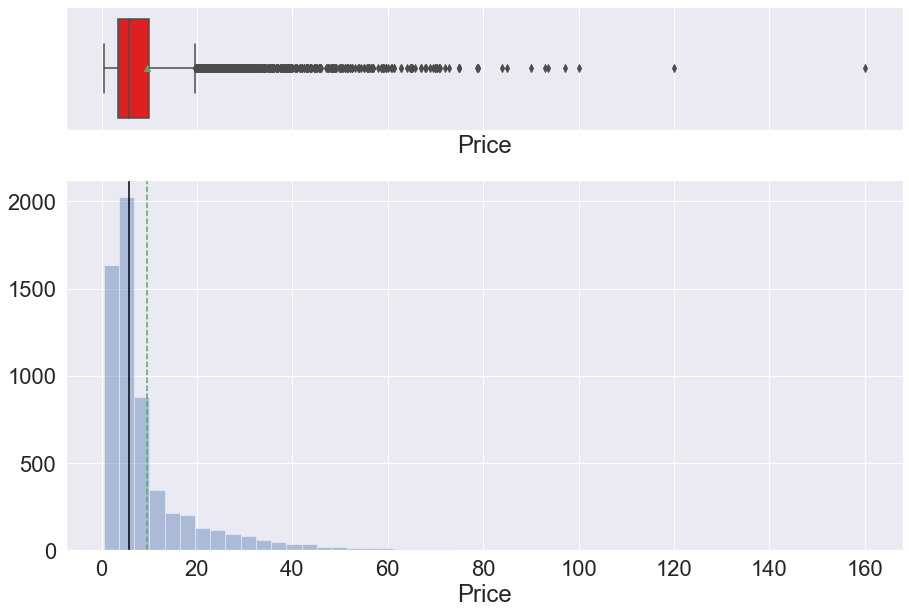

In [24]:
histogram_boxplot(cars4U.Price)

#### Observation : 
- Looks like price right skewed. 
- Most of the used cars are below 20 Lakhs and there are few cars which are higher than 20 Lakhs.

#### plot histograms for all the numeric variables

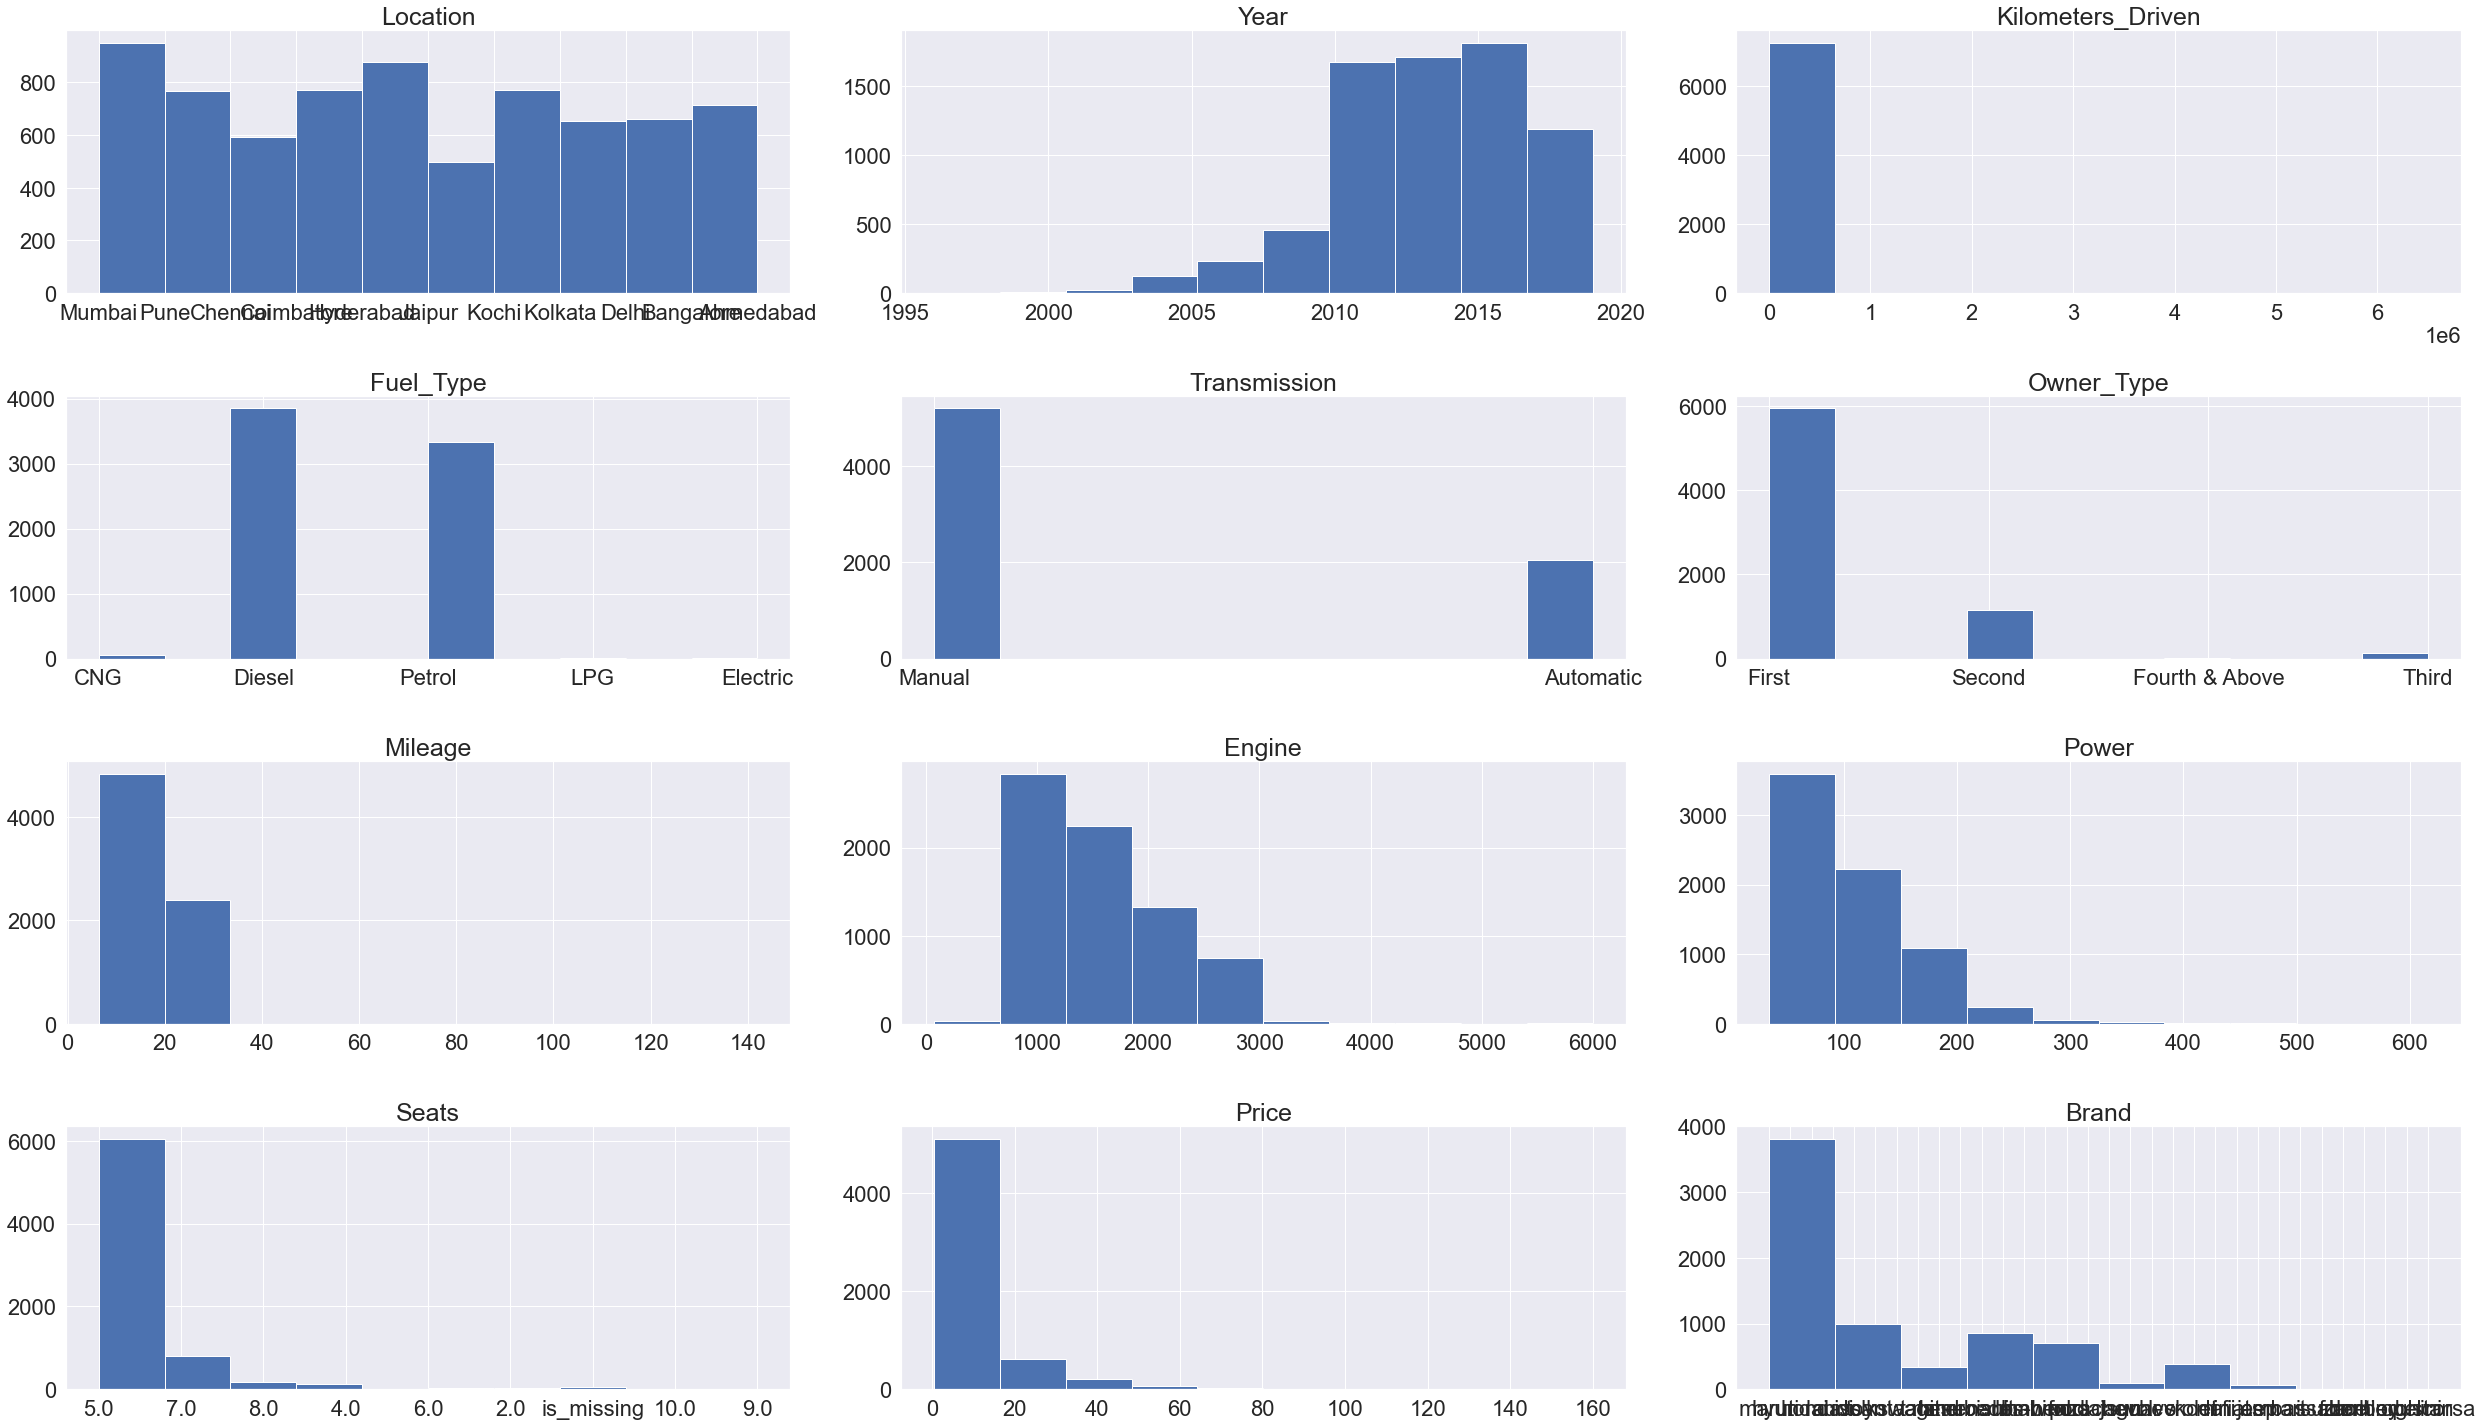

In [25]:
plt.figure(figsize=(35,25))
num_col = cars4U.select_dtypes(include=np.number).columns.tolist()
all_col = cars4U.columns
for i, col in enumerate(all_col):
    if col !='Car_Model':
        plt.subplot(5,3,i+1)
        plt.hist(cars4U[col])
        plt.tight_layout()
        plt.title(col,fontsize=25)

plt.show()

(array([3812.,  998.,  331.,  862.,  701.,   93.,  384.,   58.,    9.,
           5.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

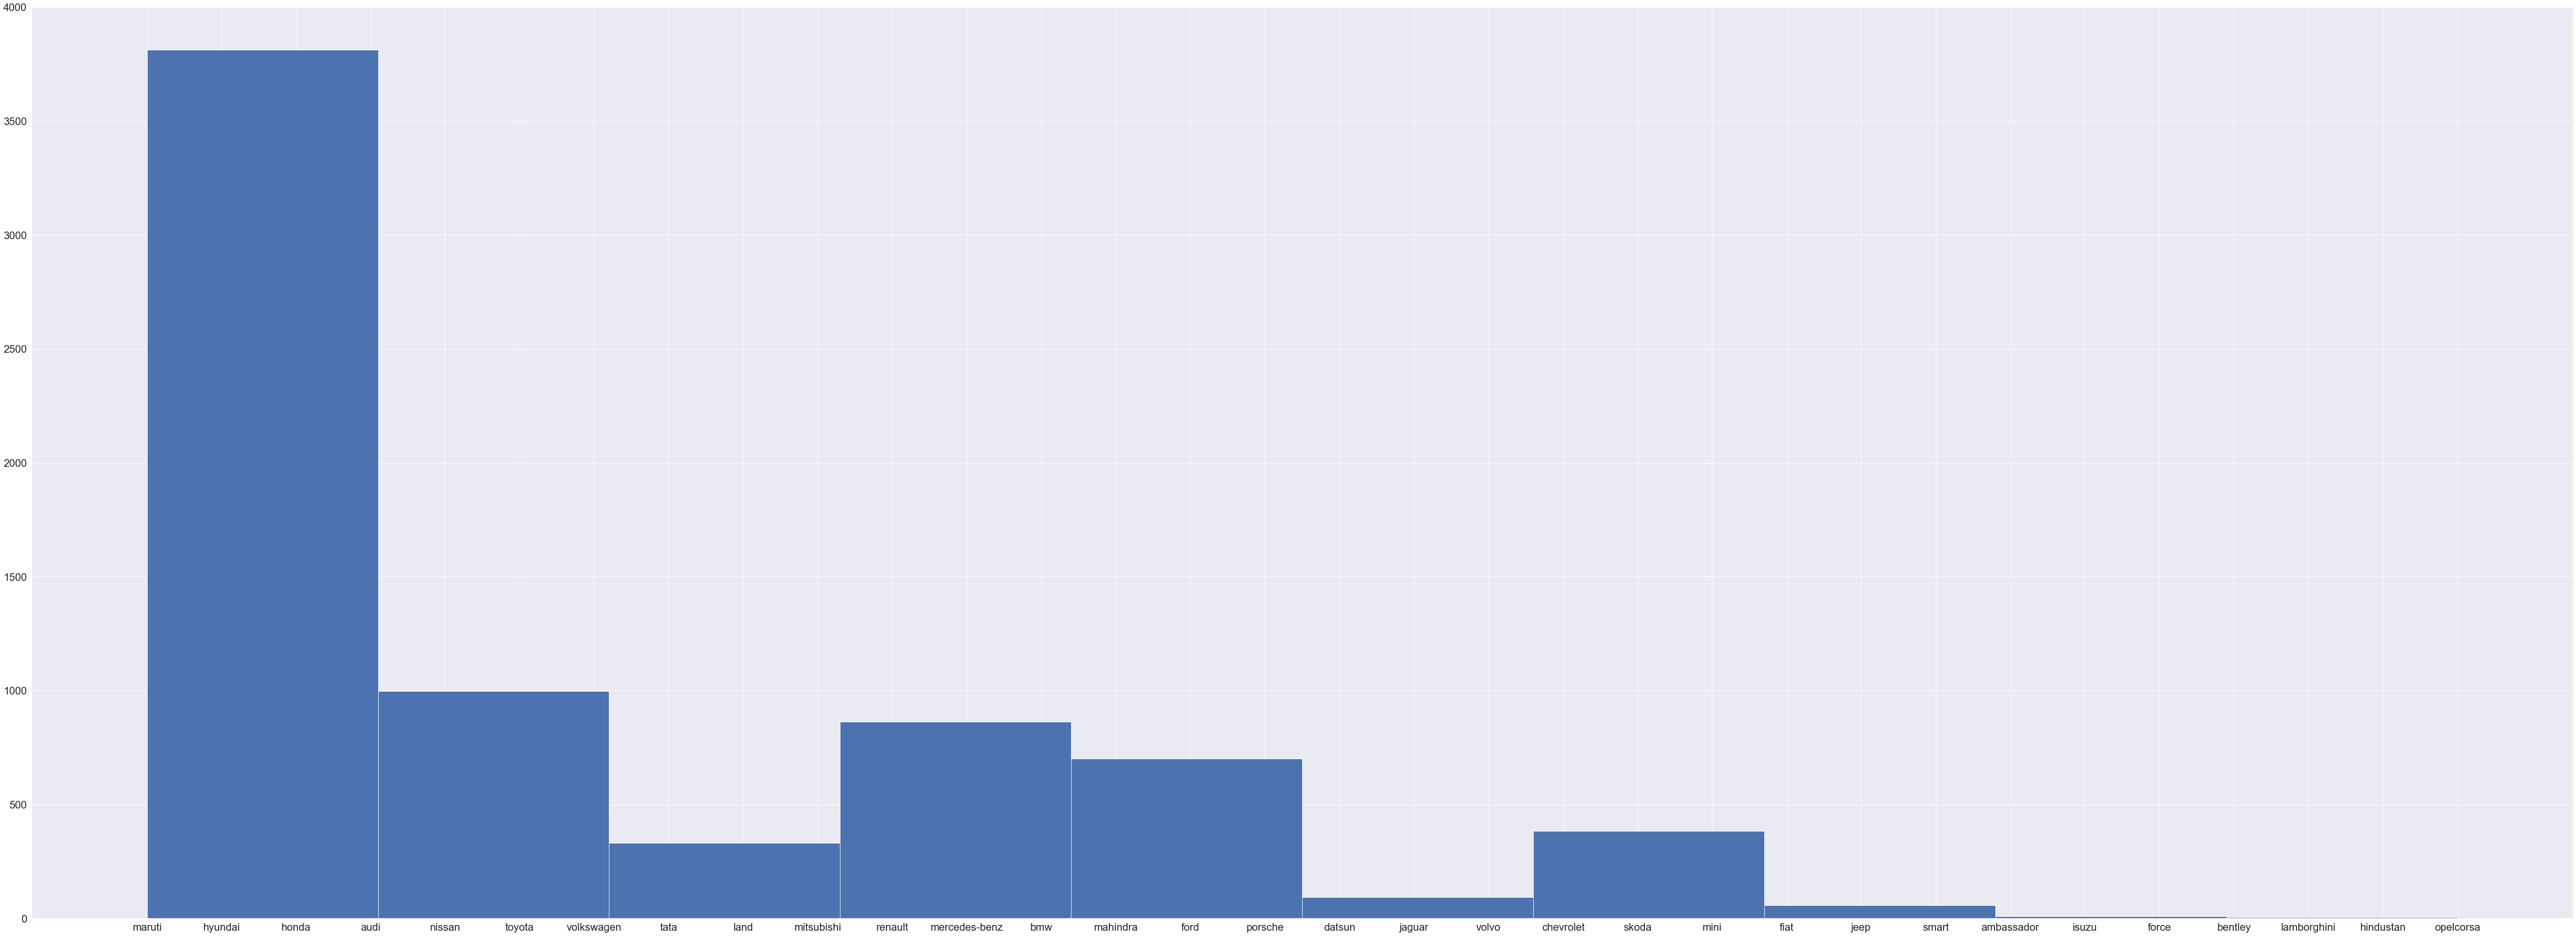

In [26]:
plt.figure(figsize=(95,35))
plt.hist(cars4U['Brand'])

(array([949., 765., 591., 772., 876., 499., 772., 654., 660., 715.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

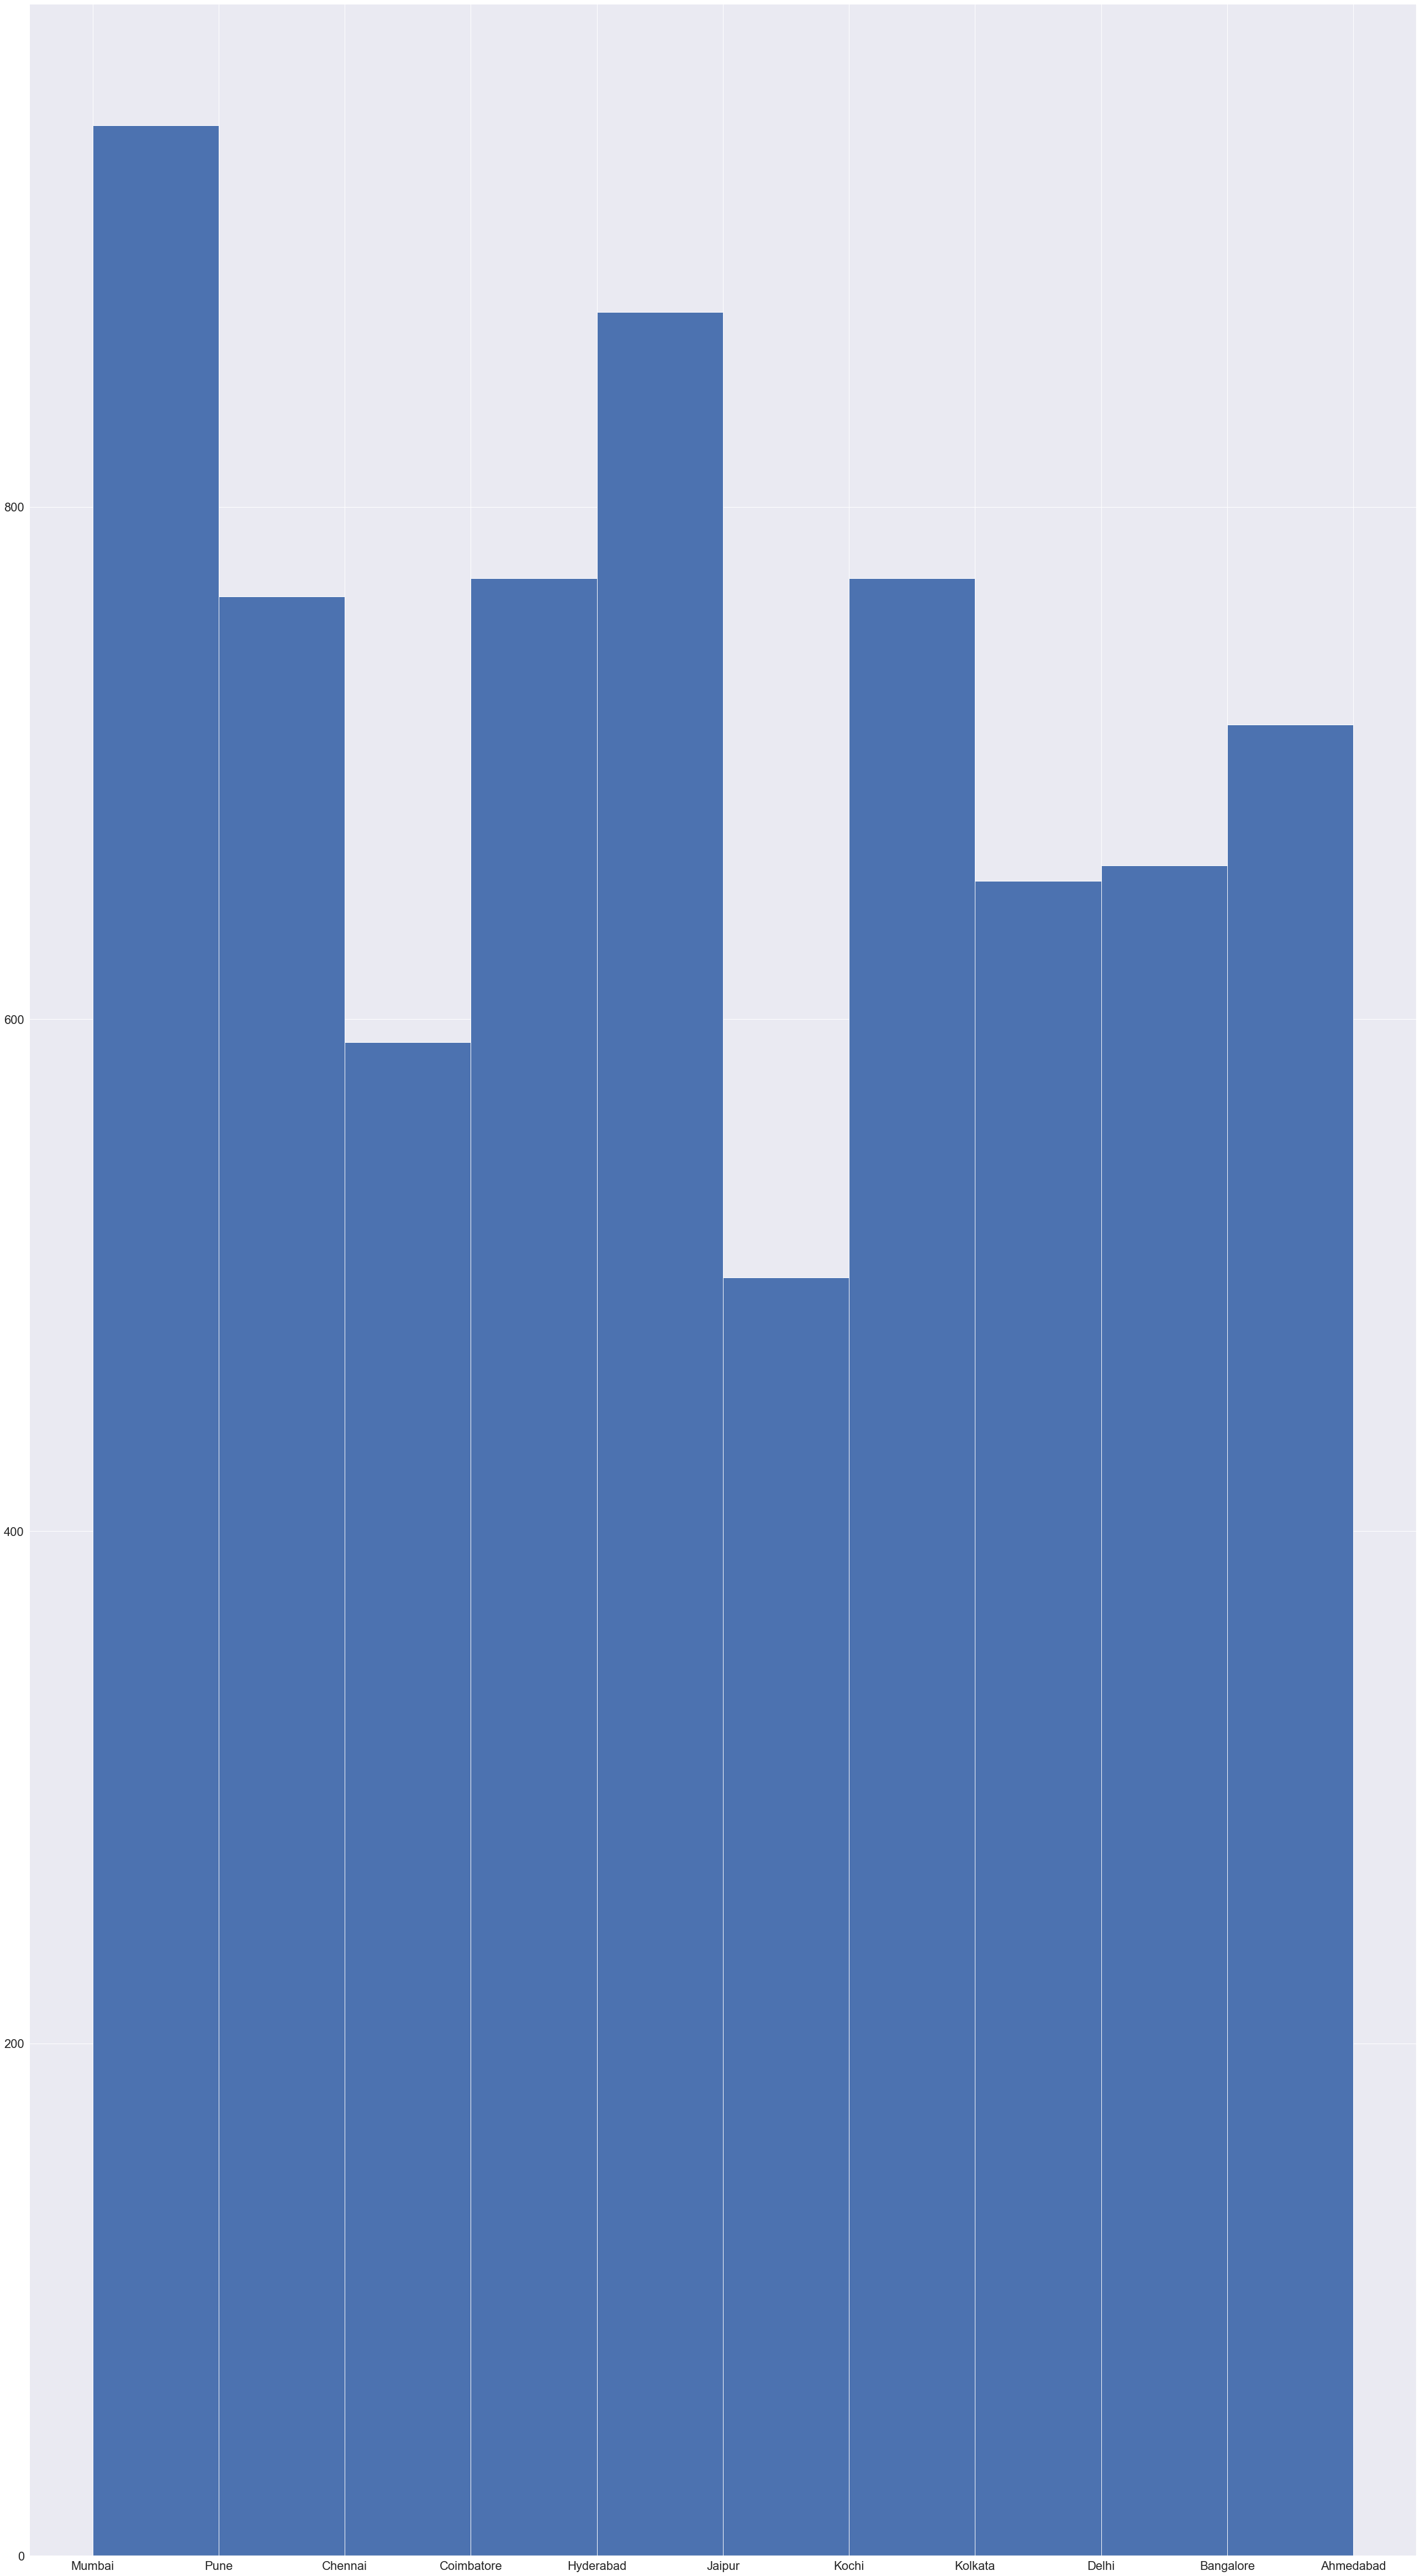

In [27]:
# location hist plot
plt.figure(figsize=(45,85))
plt.hist(cars4U['Location'])

#### Observation:
- Power,Engine & milage are right skewed.
- car manufacturing year is left skewed.
- Mruti, hyundai, honda &  audi cars were sold most.
- Ahmadabad has very less number of sales compared to other locations

#### find Outliers for all the numeric variables

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']


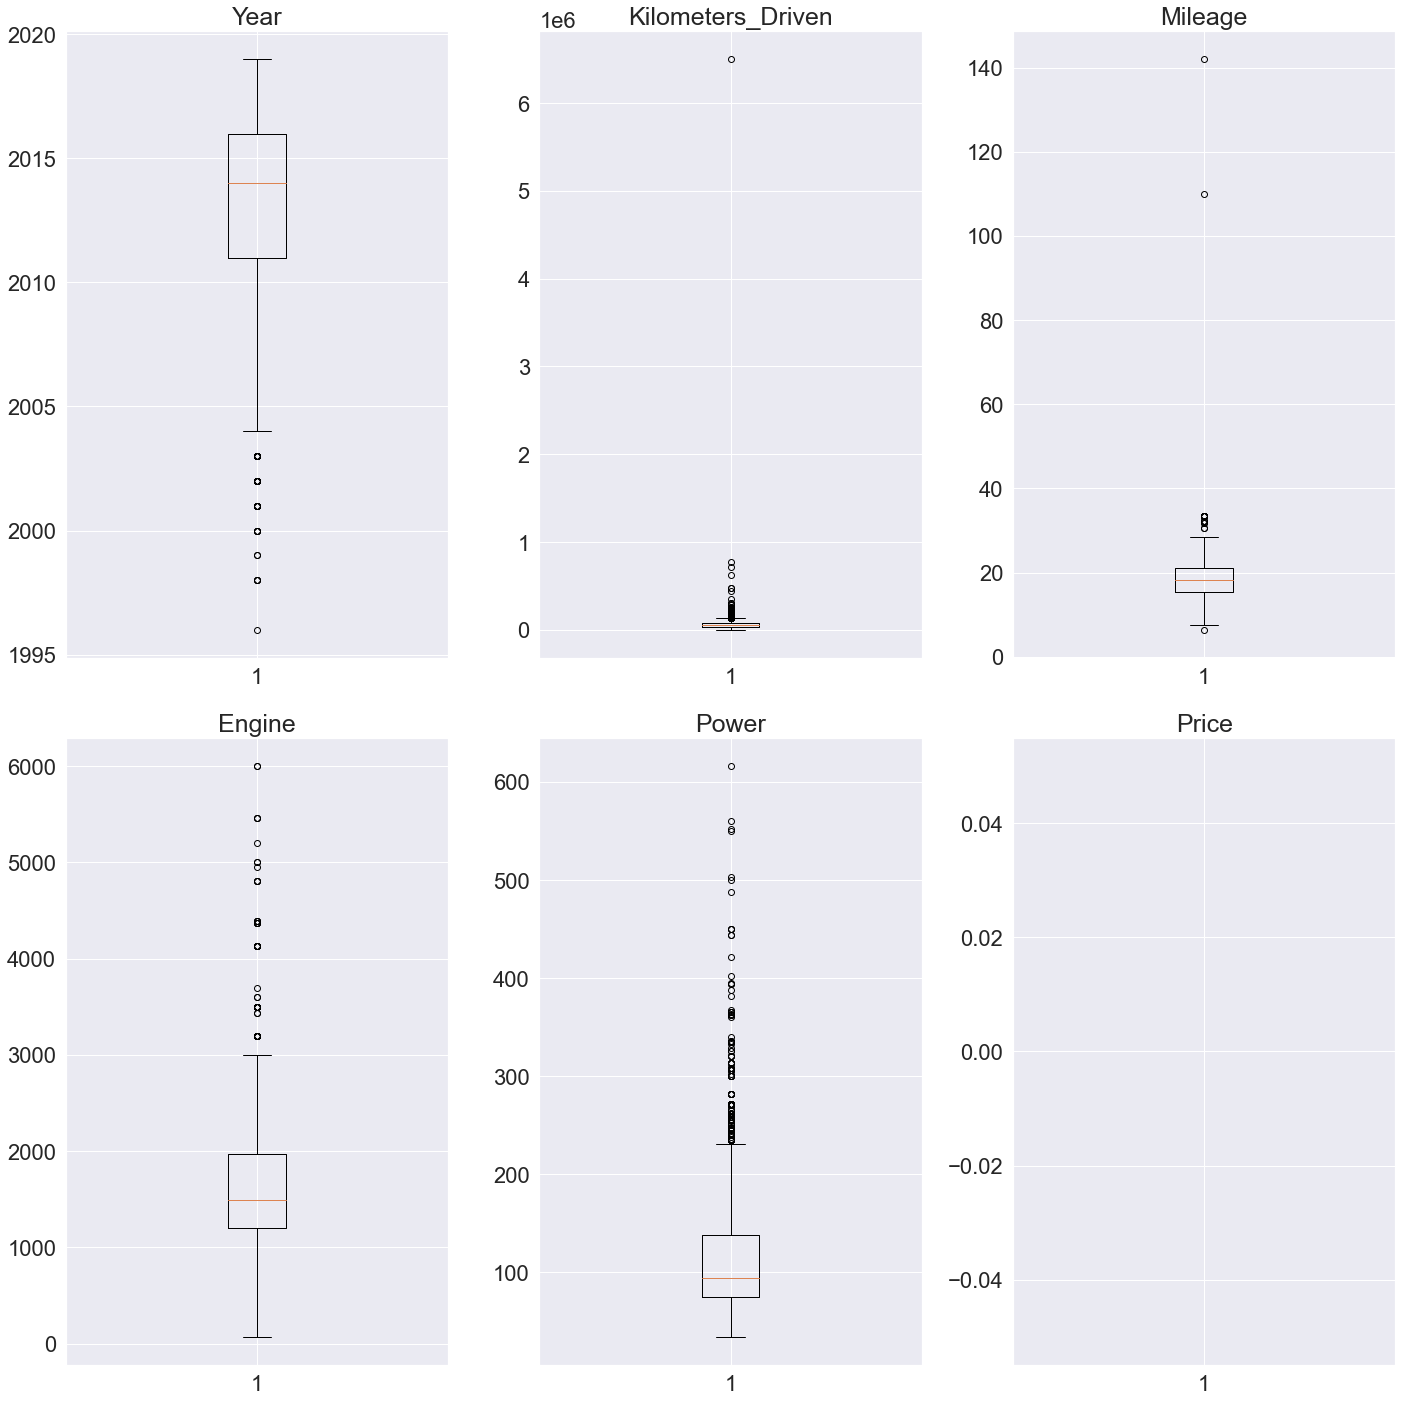

In [28]:
plt.figure(figsize=(20,20))
num_col = cars4U.select_dtypes(include=np.number).columns.tolist()
print(num_col)
for i, col in enumerate(num_col):
    plt.subplot(2,3,i+1)
    plt.boxplot(cars4U[col],whis=1.5)
    plt.tight_layout()
    plt.title(col,fontsize=25)

plt.show()

#### observation : looks like there are outliers for power, price,Mileage, Engine

#### outlier treatment

In [29]:
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=(Q3-Q1)
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [30]:
cars4U = treat_outliers_all(cars4U,num_col)

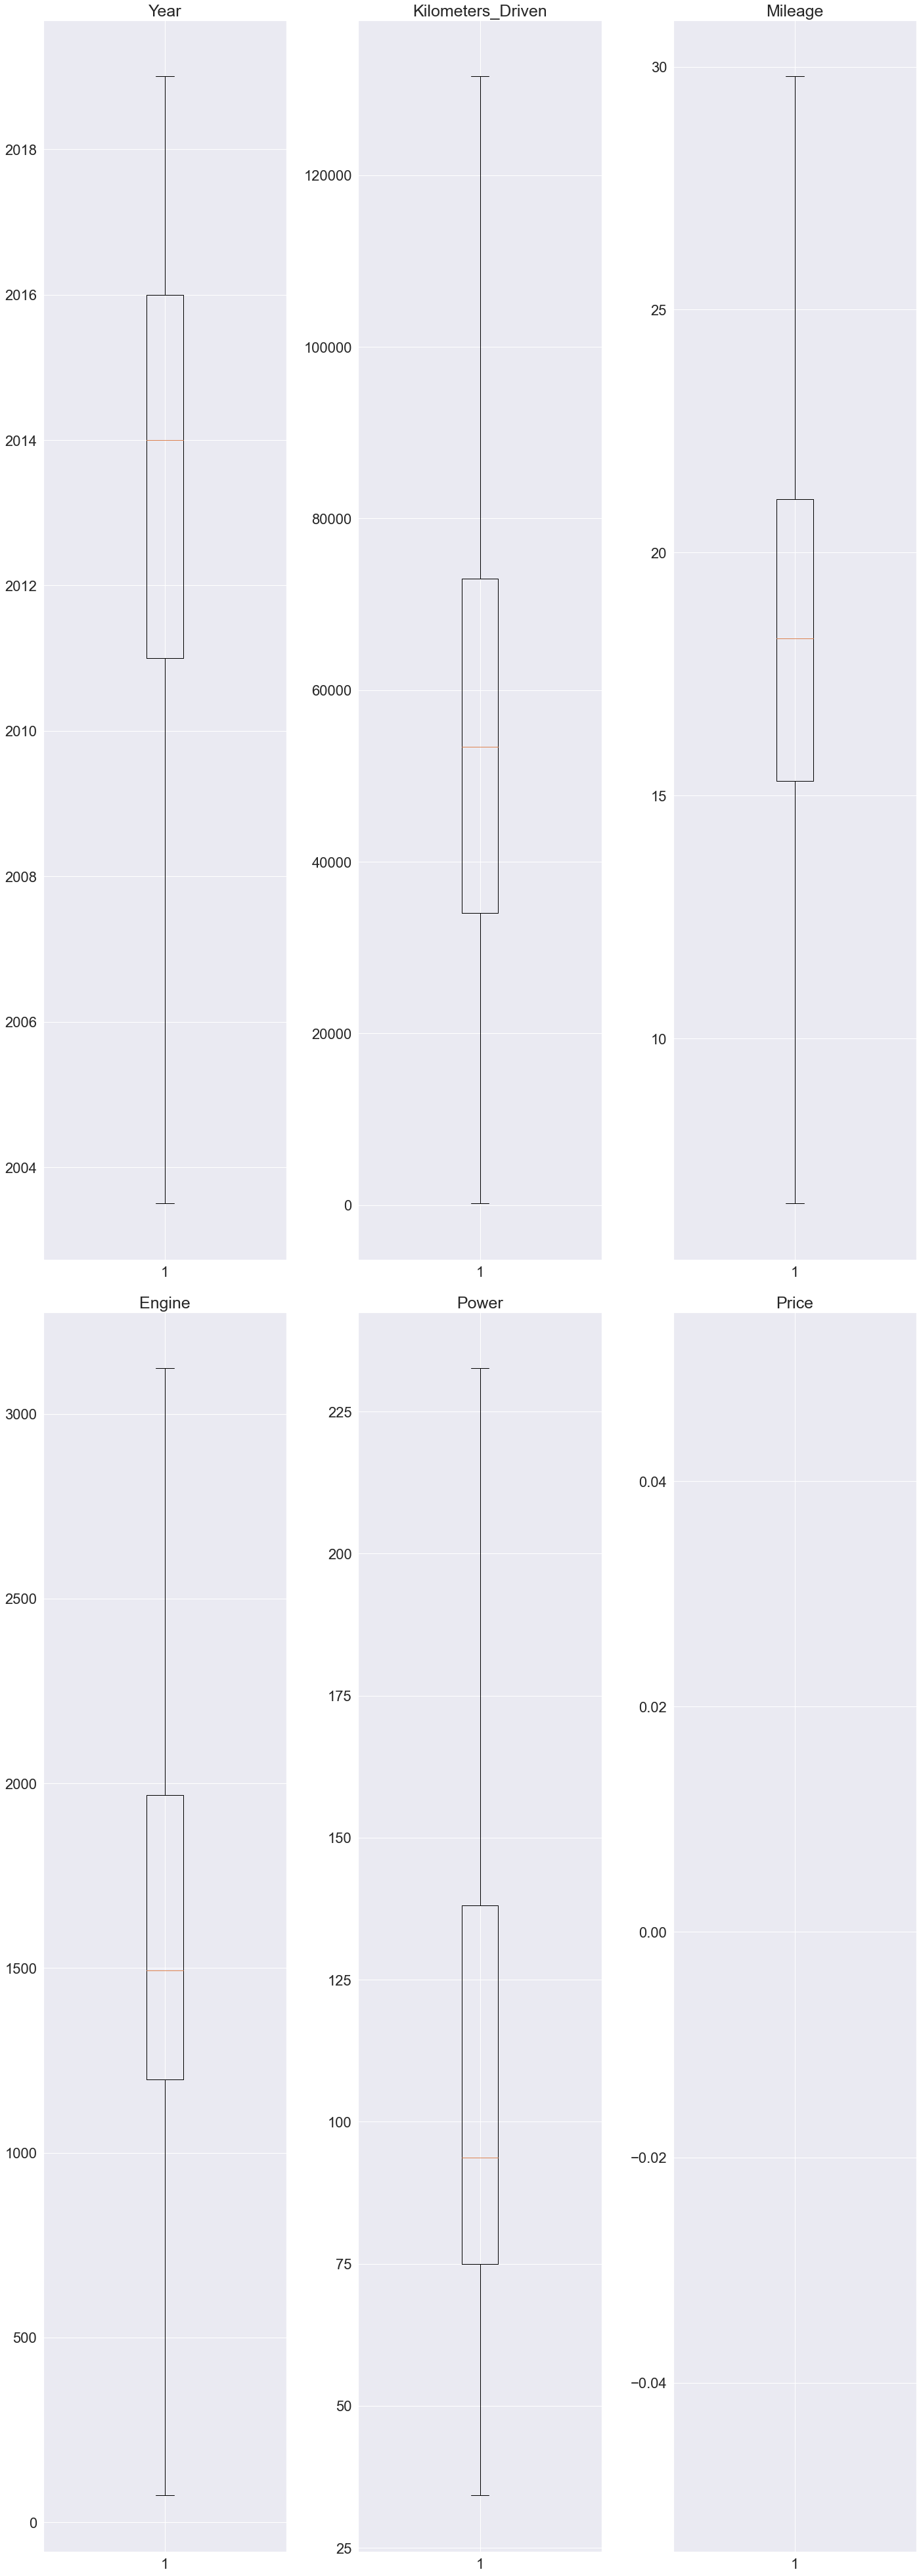

In [31]:
plt.figure(figsize=(20,55))
for i, col in enumerate(num_col):
    plt.subplot(2,3,i+1)
    plt.boxplot(cars4U[col],whis=1.5)
    plt.tight_layout()
    plt.title(col,fontsize=25)

plt.show()

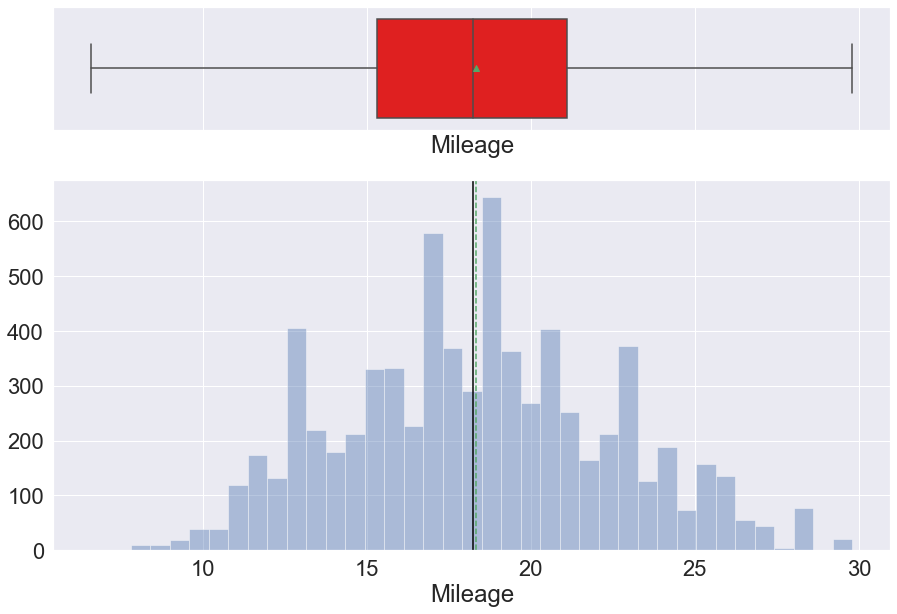

In [32]:
histogram_boxplot(cars4U.Mileage)

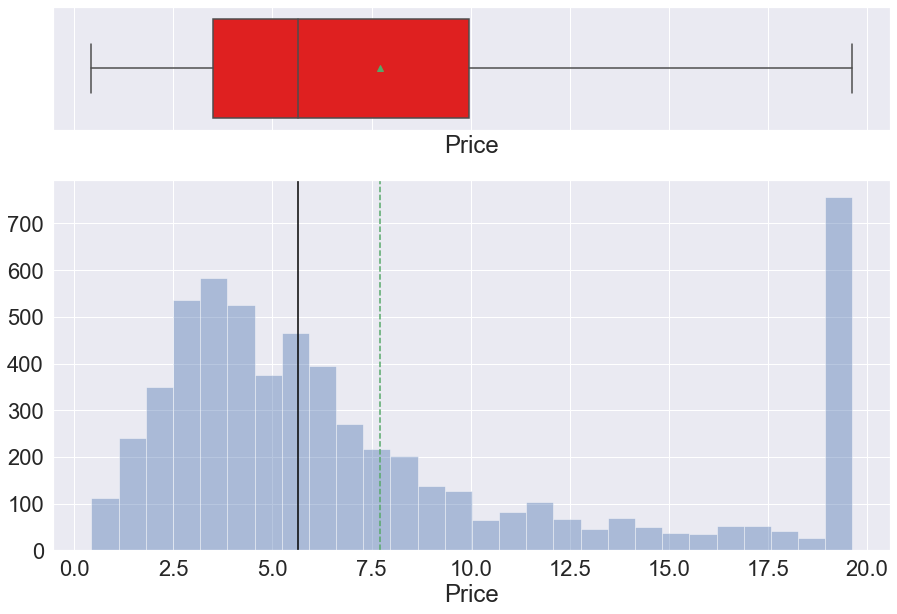

In [33]:
histogram_boxplot(cars4U.Price)

##### out liers are treated.

# Bivariate analysis

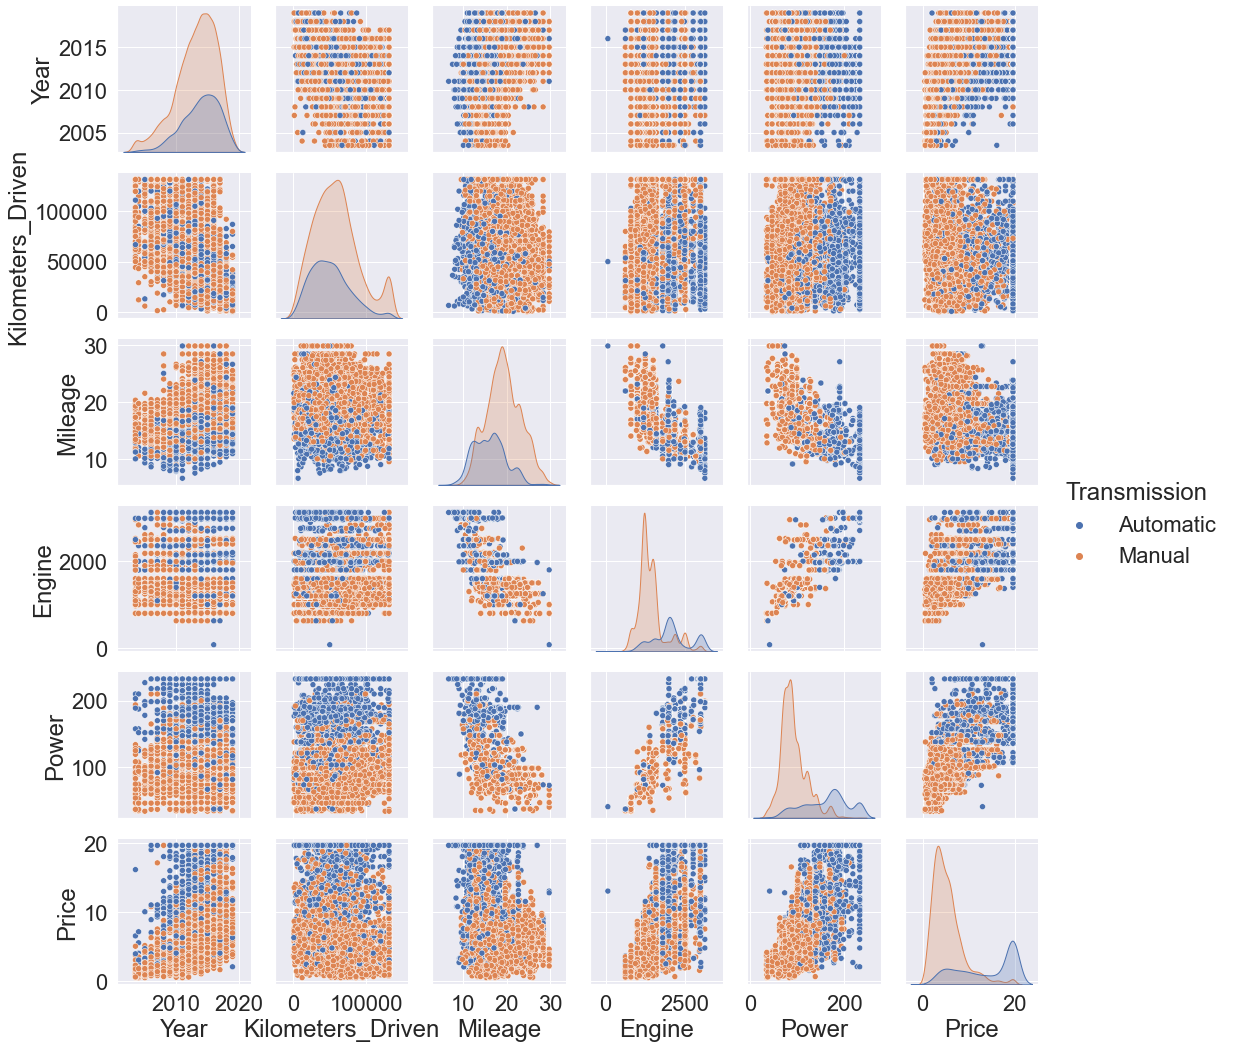

In [34]:
# check pair plot , correlation anf heat map
col_to_exclude = ['Car_Model']
sns.pairplot(cars4U[[colname for colname in cars4U.columns if colname not in col_to_exclude]], hue = 'Transmission')
plt.show()

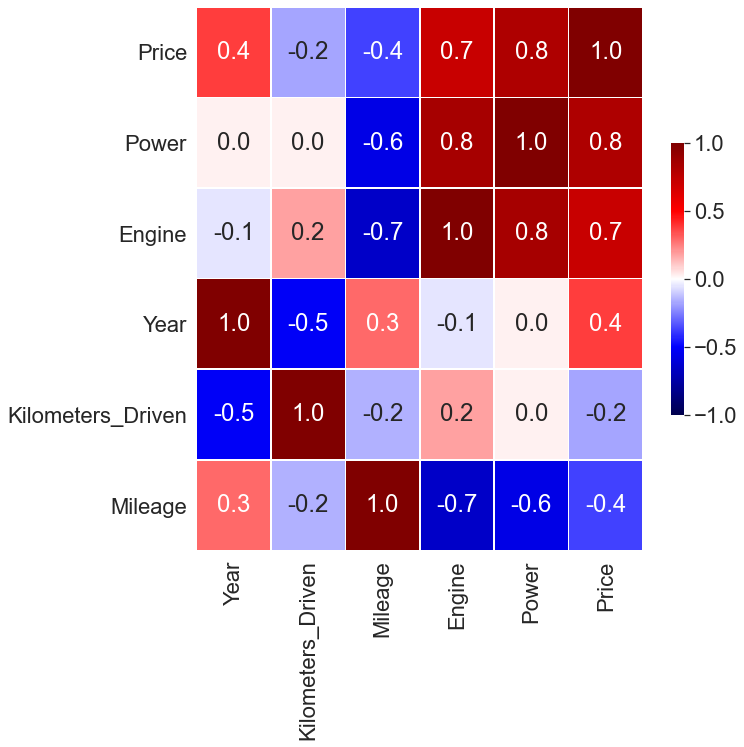

In [35]:
# correlation with respect to Price
corr = cars4U[num_col].corr().sort_values(by=['Price'],ascending=False)
plt.figure(figsize=(10,10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});
plt.show()

##### Observation : 
- price has higly positively correlation with power and Engine which means if the Engin capacity and power is more then price is also high.
- price has little possitive correlation with Year of manufacturing which means if the year of manuafacturing is old then price is little less.
- price has little negative correlation with mileage whcih means price is little less for high mileage.

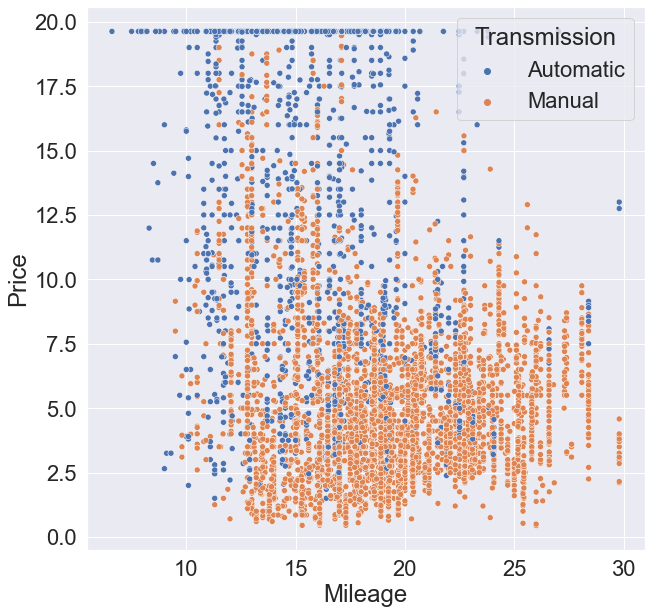

In [36]:
# price vs Mileage vs transmission
plt.figure(figsize=(10,10))
sns.scatterplot(y='Price', x='Mileage', hue='Transmission', data=cars4U);

#### Observation :
- Most of the cars which are manual sold below 10 lakhs. Does not have much impact of milage on price.

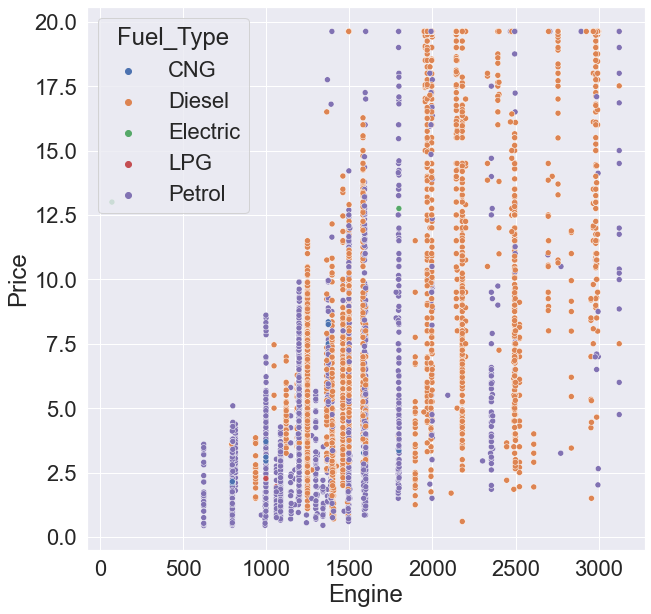

In [37]:
# price vs engine vs fuel type
plt.figure(figsize=(10,10))
sns.scatterplot(y='Price', x='Engine', hue='Fuel_Type', data=cars4U);

#### observation : 
- most of the engines are diesel type with > (~ 1500 CC) are higher in price
- most of the engines of petrol type with < (~ 1600 CC) are below 12.5 in price


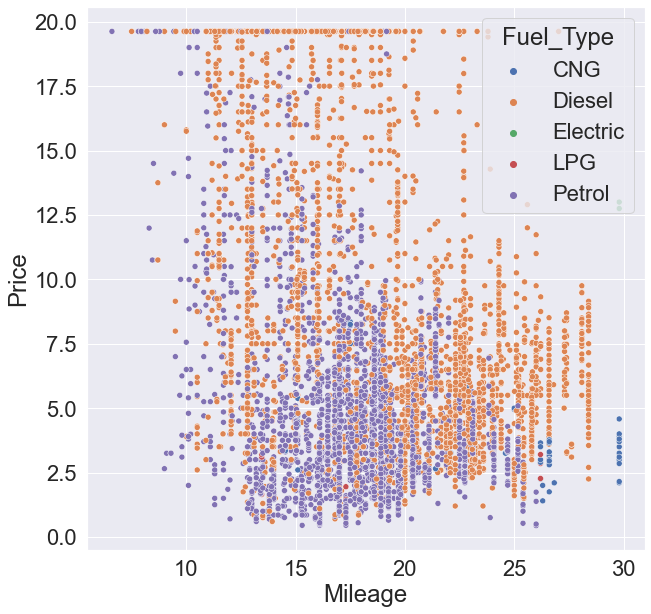

In [38]:
# price vs Mileage vs Fuel_Type
plt.figure(figsize=(10,10))
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars4U);

#### observation : 
- most of the diesel type vehicles are have higher mileage (> ~ 20 )but below 10 lakhs
- most of the petrol type vehicles have mileage less than ~ 20 and below 10 lakhs

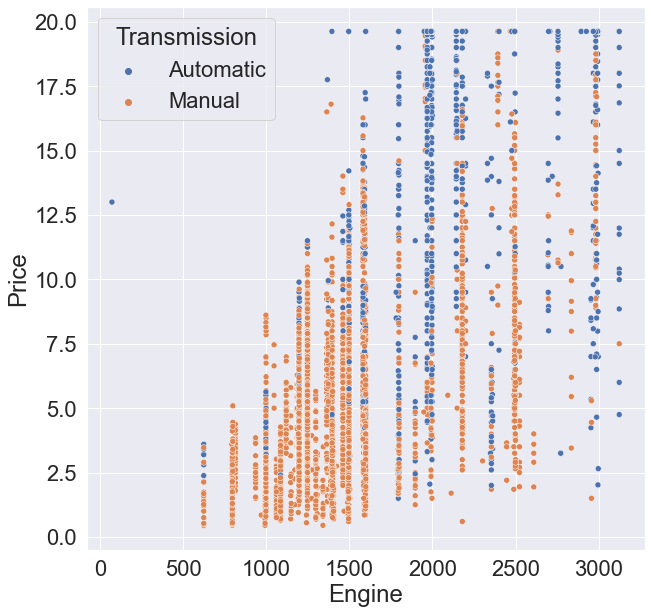

In [39]:
# price vs engine vs Transmission
plt.figure(figsize=(10,10))
sns.scatterplot(y='Price', x='Engine', hue='Transmission', data=cars4U);

#### Observation : 
- Most of the manual type vehicle has engine CC less than 1500 and has price below 10 Lakhs
- Most of the Automatics has high  engine cc >  ~1500 CC

In [40]:
# fixing the Year type from float to integer
print(cars4U.info())
cars4U['Year'] = cars4U['Year'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   float64 
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   category
 10  Price              6019 non-null   float64 
 11  Brand              7253 non-null   category
 12  Car_Model          7253 non-null   object  
dtypes: category(6), float64(5), int64(1), object(1)
memory usage: 818.6+ KB
None


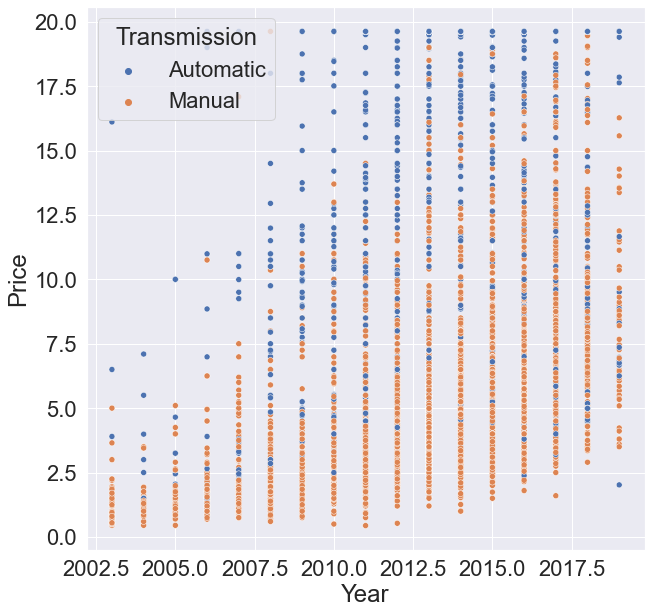

In [41]:
# price vs Manufacturing Year vs Transmission
plt.figure(figsize=(10,10))
sns.scatterplot(y='Price', x='Year', hue='Transmission', data=cars4U);

#### observation :
- most of the automatic transmission cars higher in price compared to manual and price increases slighly with year of manuafacturing. 

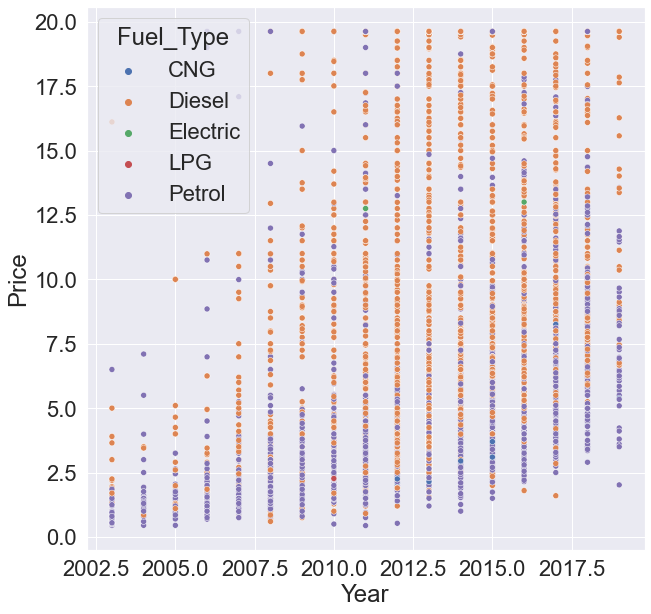

In [42]:
# price vs Manufacturing Year vs fuel type
plt.figure(figsize=(10,10))
sns.scatterplot(y='Price', x='Year', hue='Fuel_Type', data=cars4U);

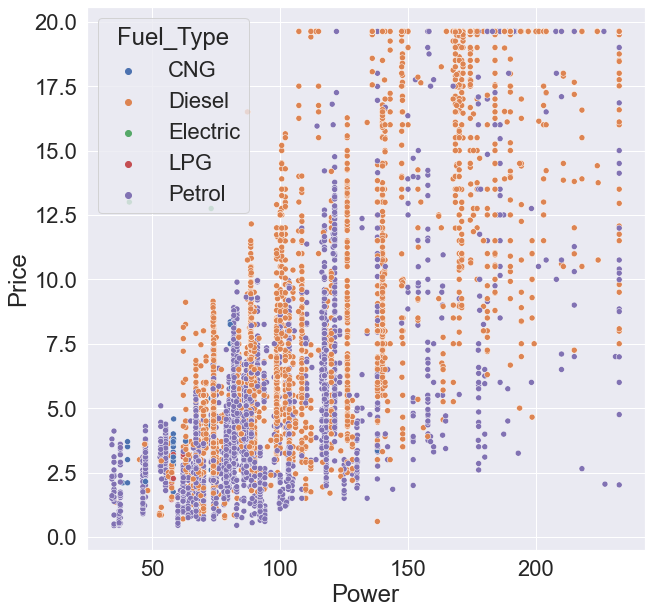

In [43]:
# price vs power vs fuel type
plt.figure(figsize=(10,10))
sns.scatterplot(y='Price', x='Power', hue='Fuel_Type', data=cars4U);

##### Observation : 
- Petrol type vehicles are mostly having power below ~150 HP and as power increases price also increases.
- Deisel type vehicles are mostly having power above ~80 HP as power increases price also increases.

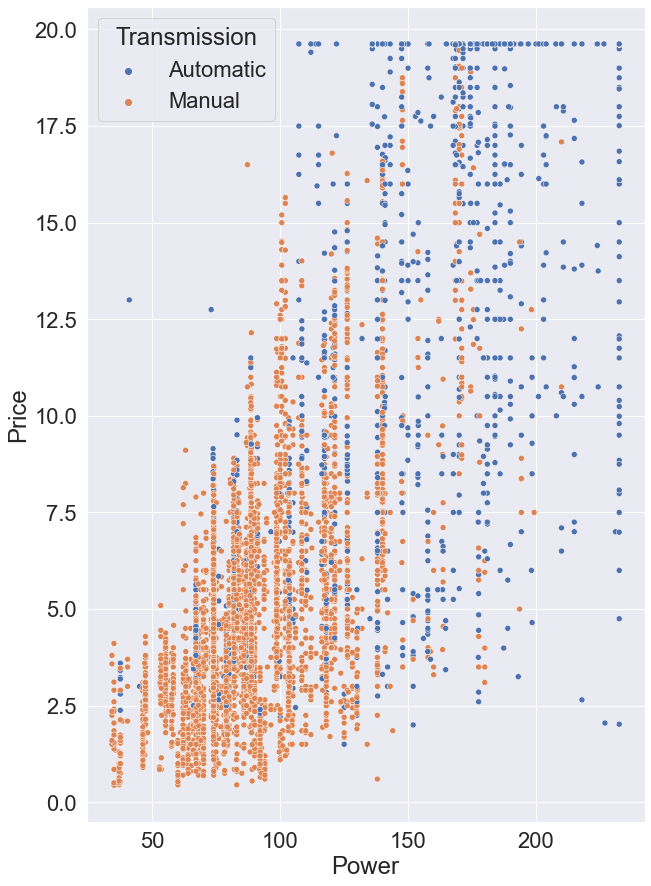

In [44]:
# price vs power vs transmission
plt.figure(figsize=(10,15))
sns.scatterplot(y='Price', x='Power', hue='Transmission', data=cars4U);

#### Observation : 
- most of the Manual type vehicles are having less power and below 10 lakhs
- But most of the automatic type vehicles are having more power above 100 and more price.

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

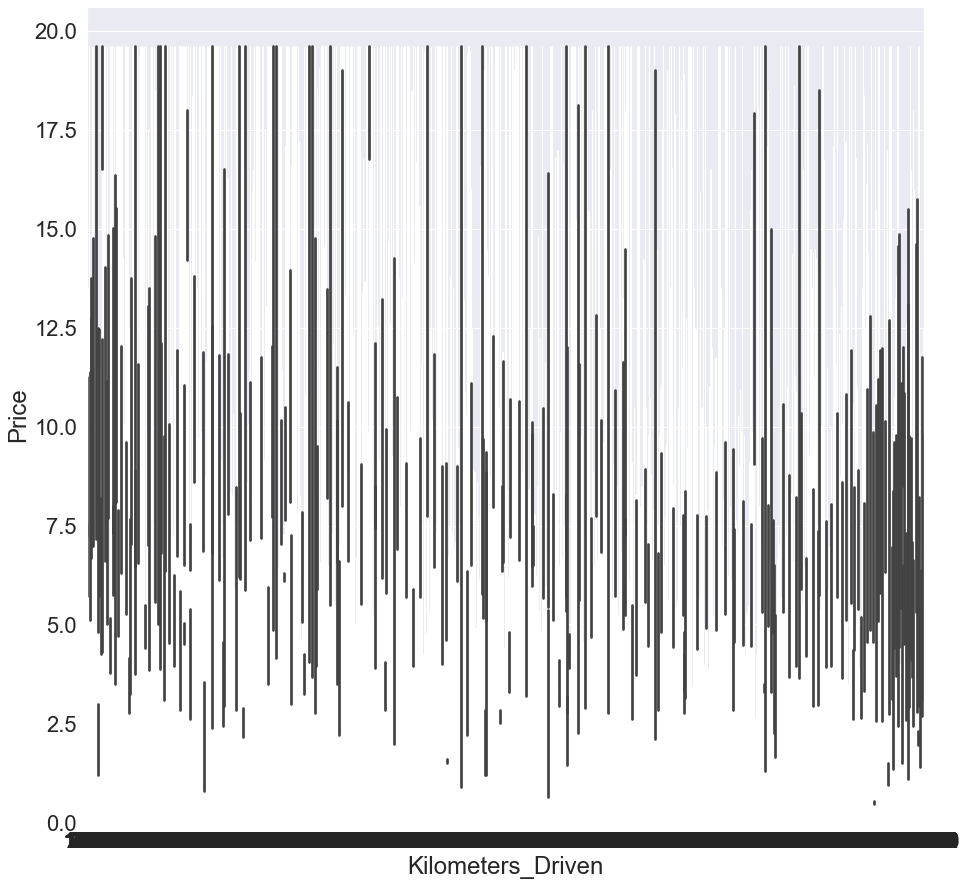

In [45]:
# price vs Kilometers driven
plt.figure(figsize=(15,15))
sns.barplot(x='Kilometers_Driven',y='Price', data=cars4U, orient="v")

#### Observation : price is higher for the cars driven under 50k kilometers 

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

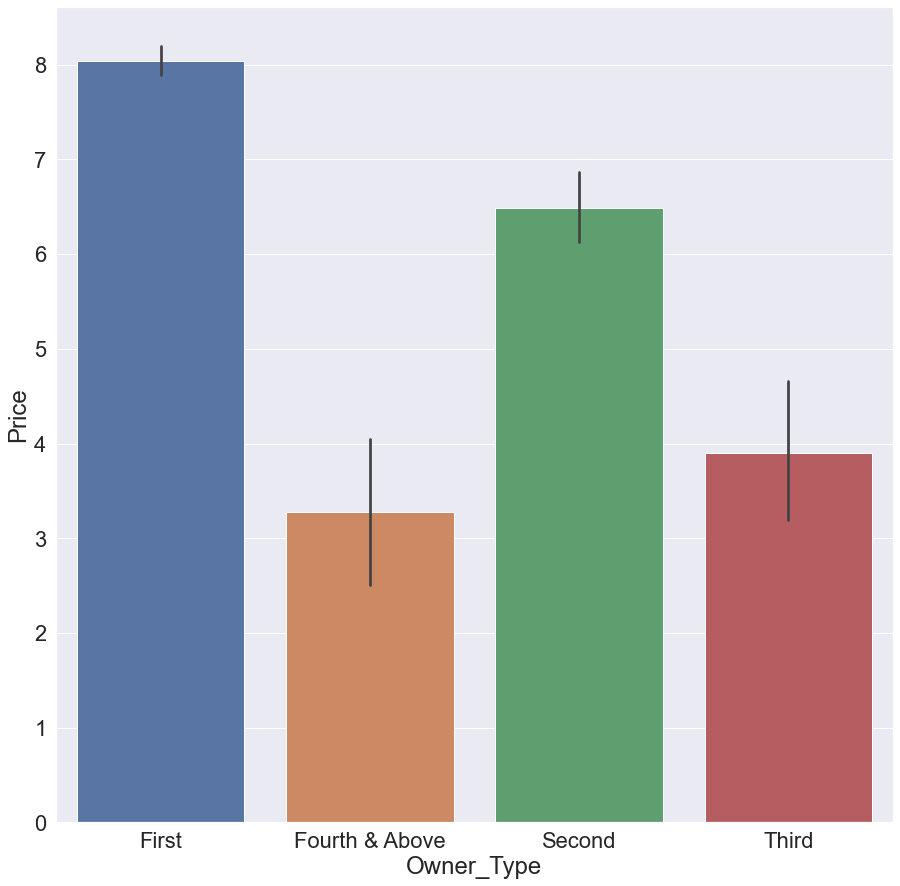

In [46]:
# price vs Owner type
plt.figure(figsize=(15,15))
sns.barplot(x='Owner_Type',y='Price', data=cars4U, orient="v")

#### Observation : there is better price for the cars which are First & second owner types

<AxesSubplot:xlabel='Location', ylabel='Price'>

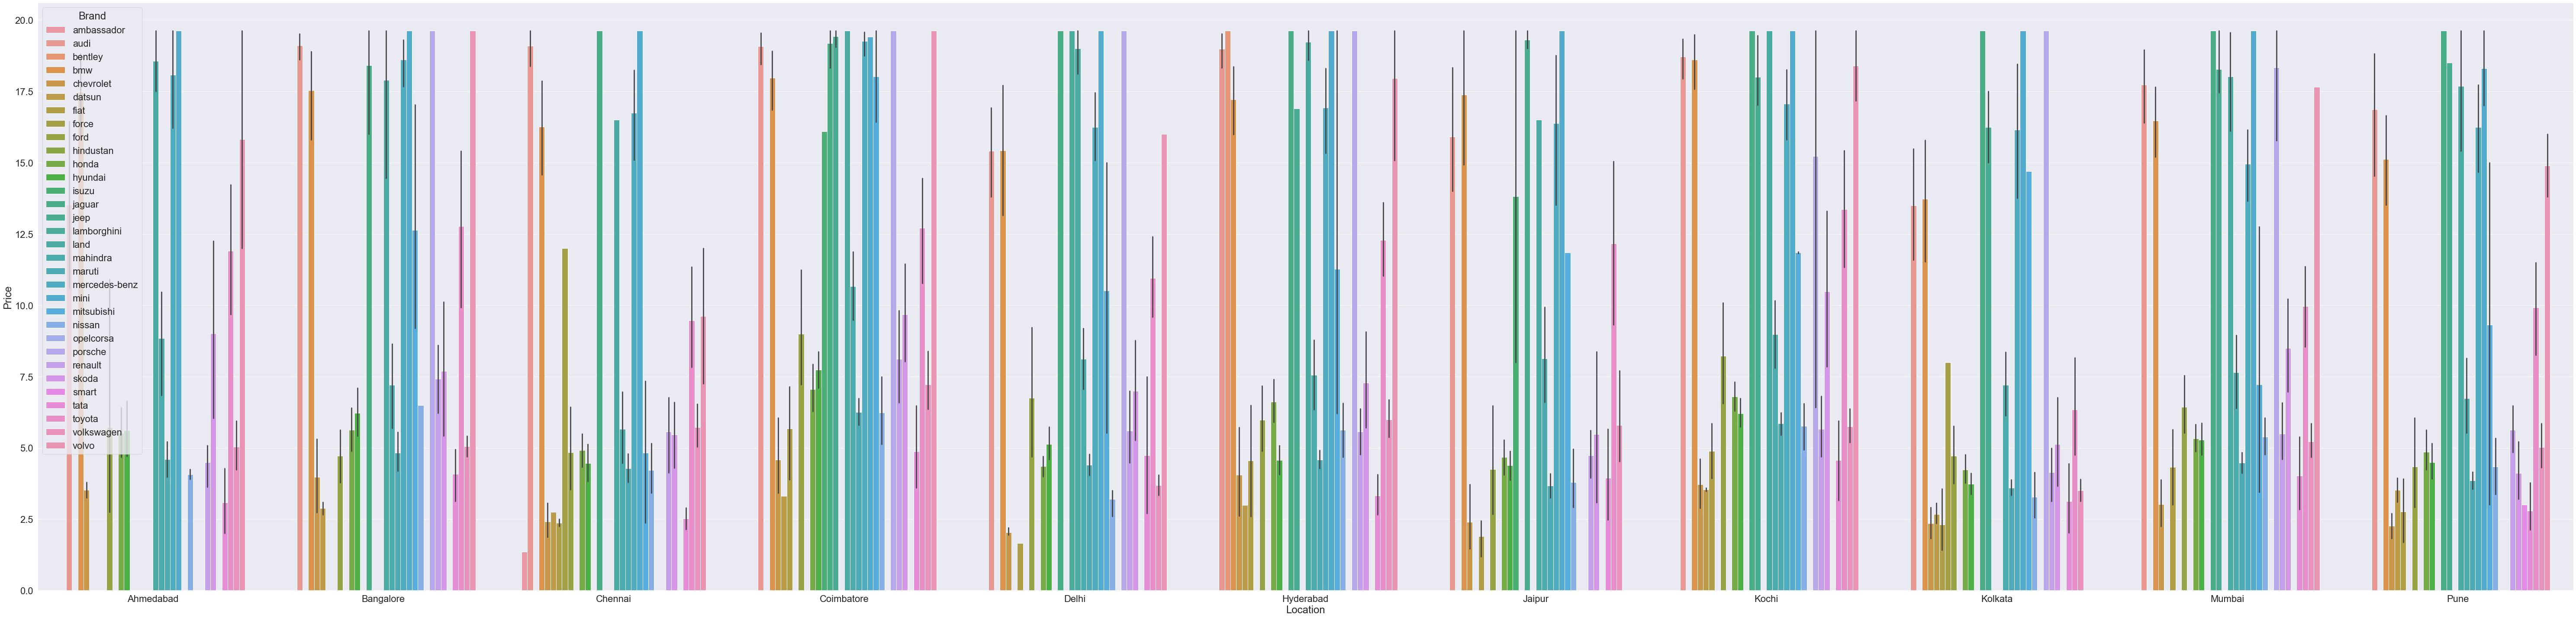

In [47]:
# price vs Location vs Brand
plt.figure(figsize=(105,25))
sns.barplot(x='Location',y='Price', data=cars4U,hue='Brand')

#### Observation : brands Audi, bentley, bmw, isuzu, jaguar, jeep, lombargini, Land rover,Mercides porsche, volvo has high price

<AxesSubplot:xlabel='Brand', ylabel='Price'>

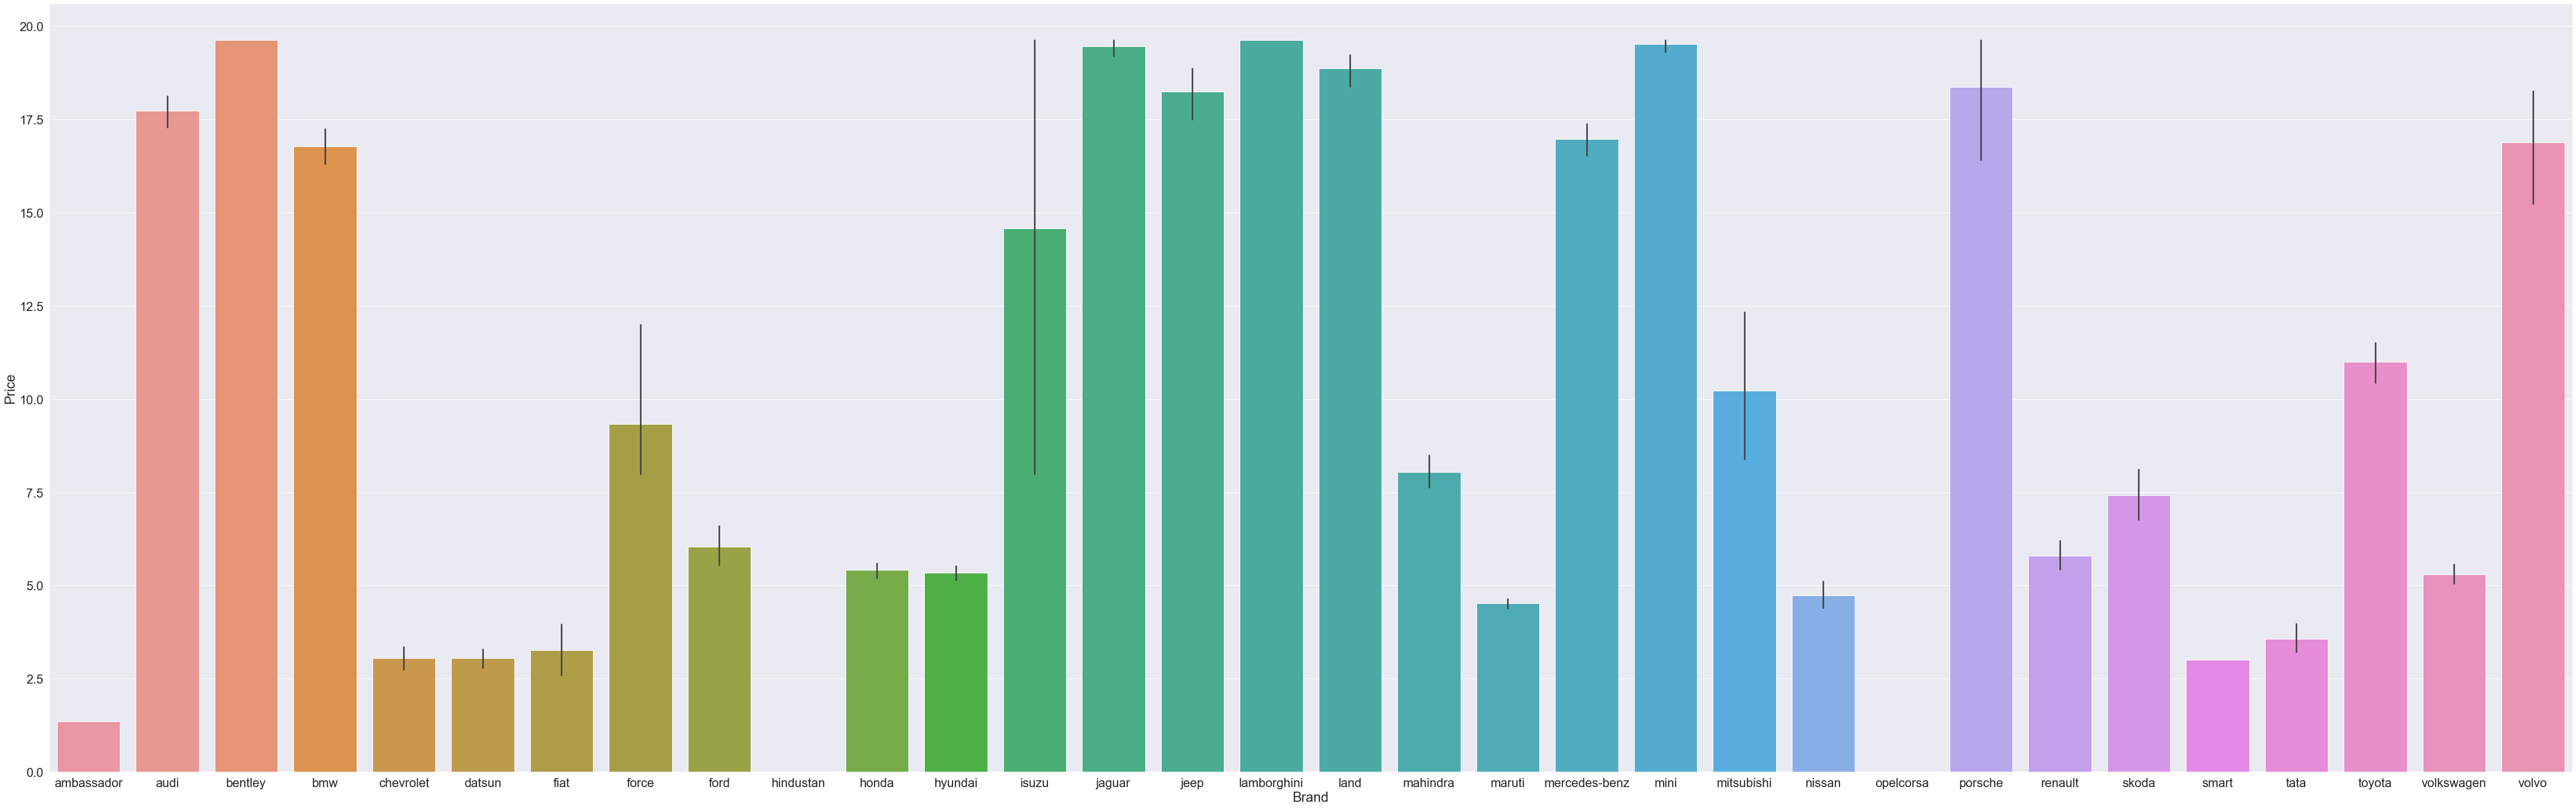

In [48]:
# price vs Seats
plt.figure(figsize=(80,25))
sns.barplot(x='Brand',y='Price', data=cars4U)

#### Observation :  
- brands Audi, bentley, bmw, isuzu, jaguar, jeep, lombargini, Land rover,Mercides porsche, volvo has high price
- brands Chevi, Datsun, Fiat, Force ,ford, honda, Hyundai, Mahindra, Maruthi, NissanRenolt, Skoda, Smart, Tata & Volkswagen are little below avarage car price.
- Brands Ambassador, Hindustan , OpelCorsa are cheapest in price.


<AxesSubplot:xlabel='Seats', ylabel='Price'>

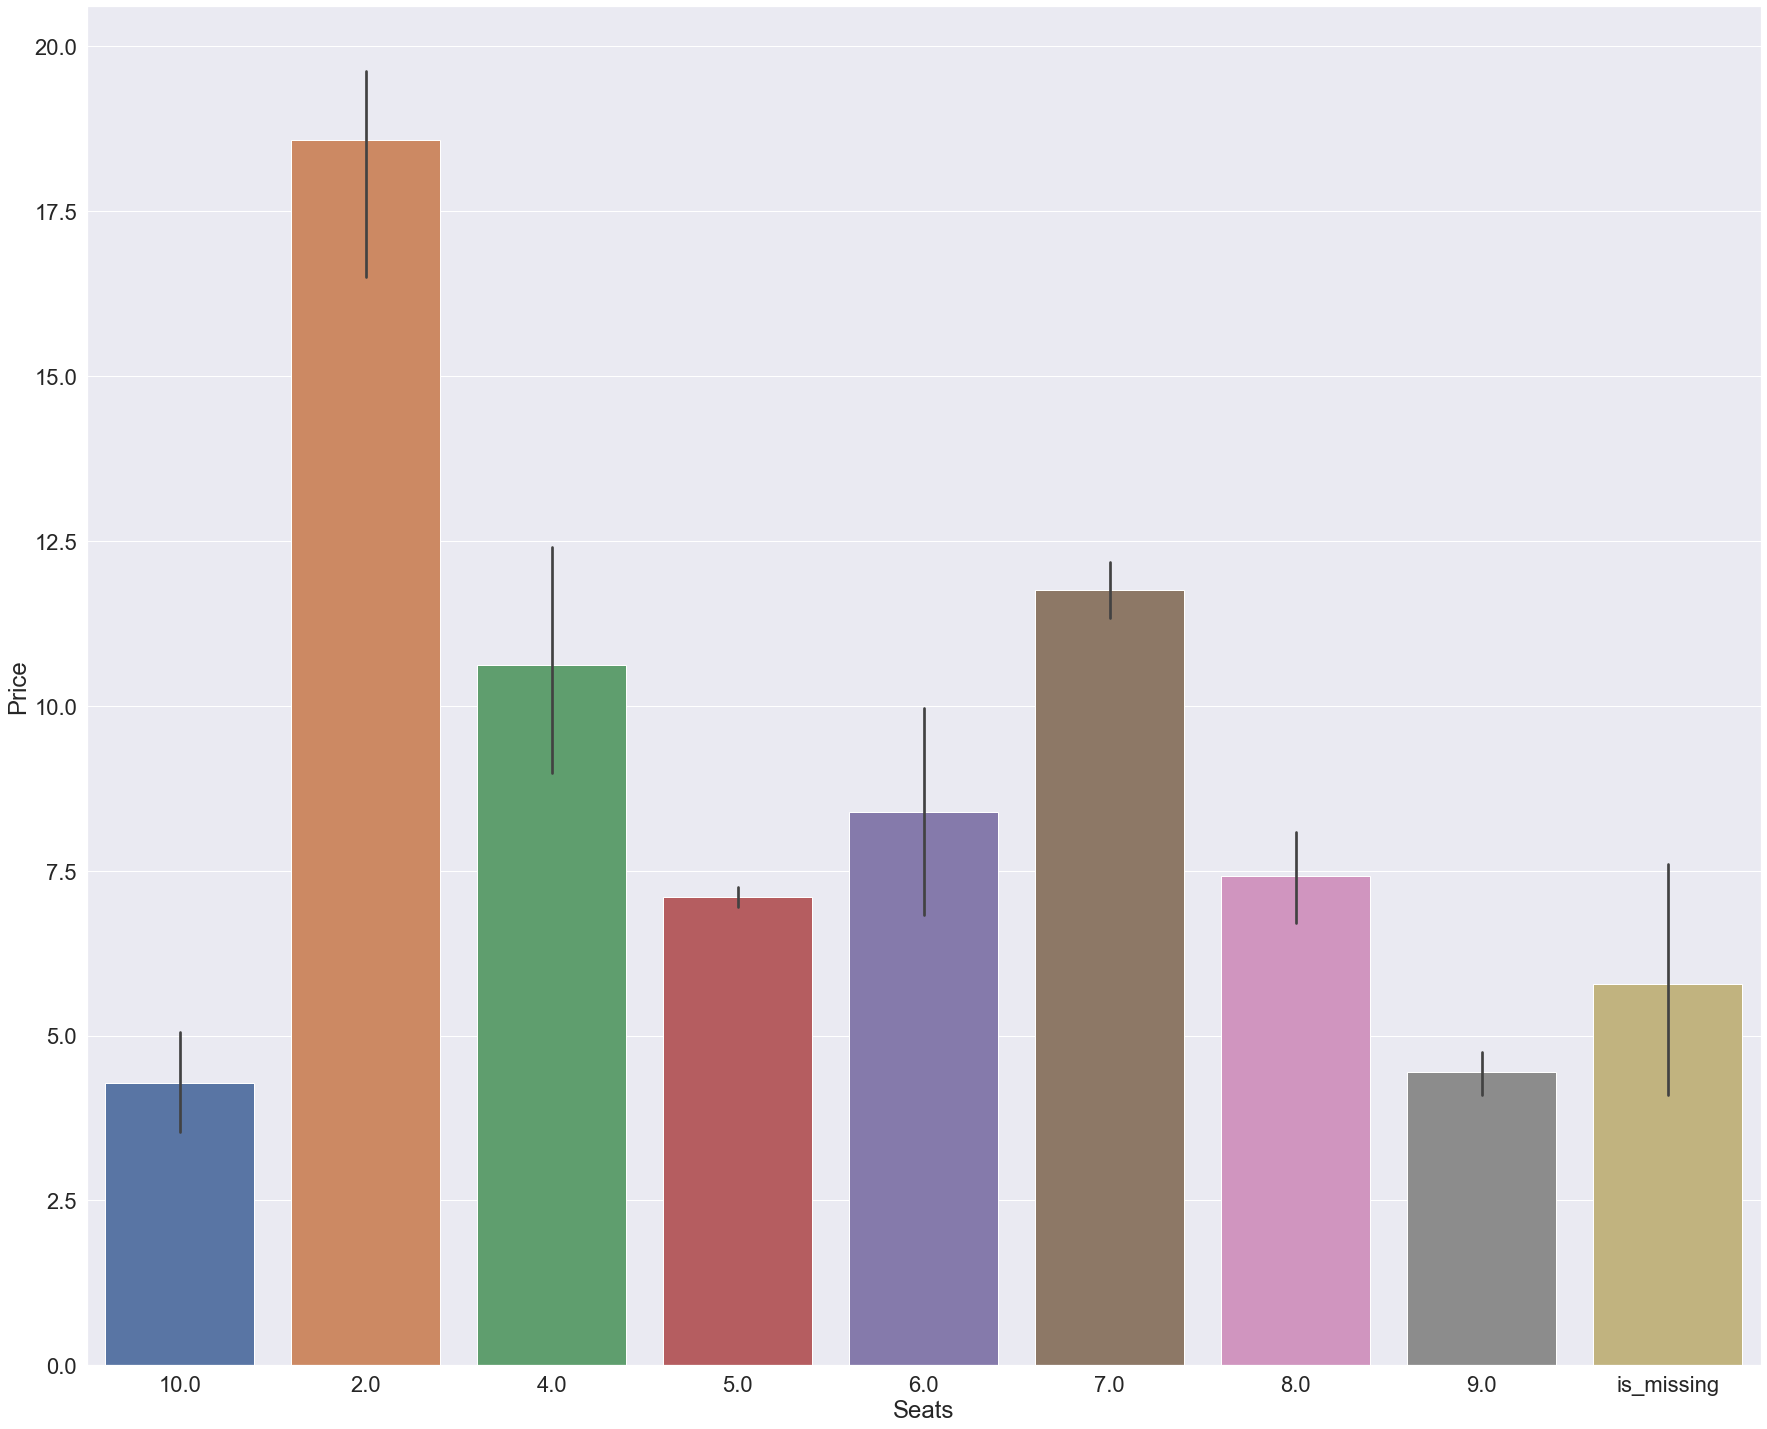

In [49]:
# price vs Seats
plt.figure(figsize=(30,25))
sns.barplot(x='Seats',y='Price', data=cars4U)

<AxesSubplot:xlabel='Location', ylabel='Price'>

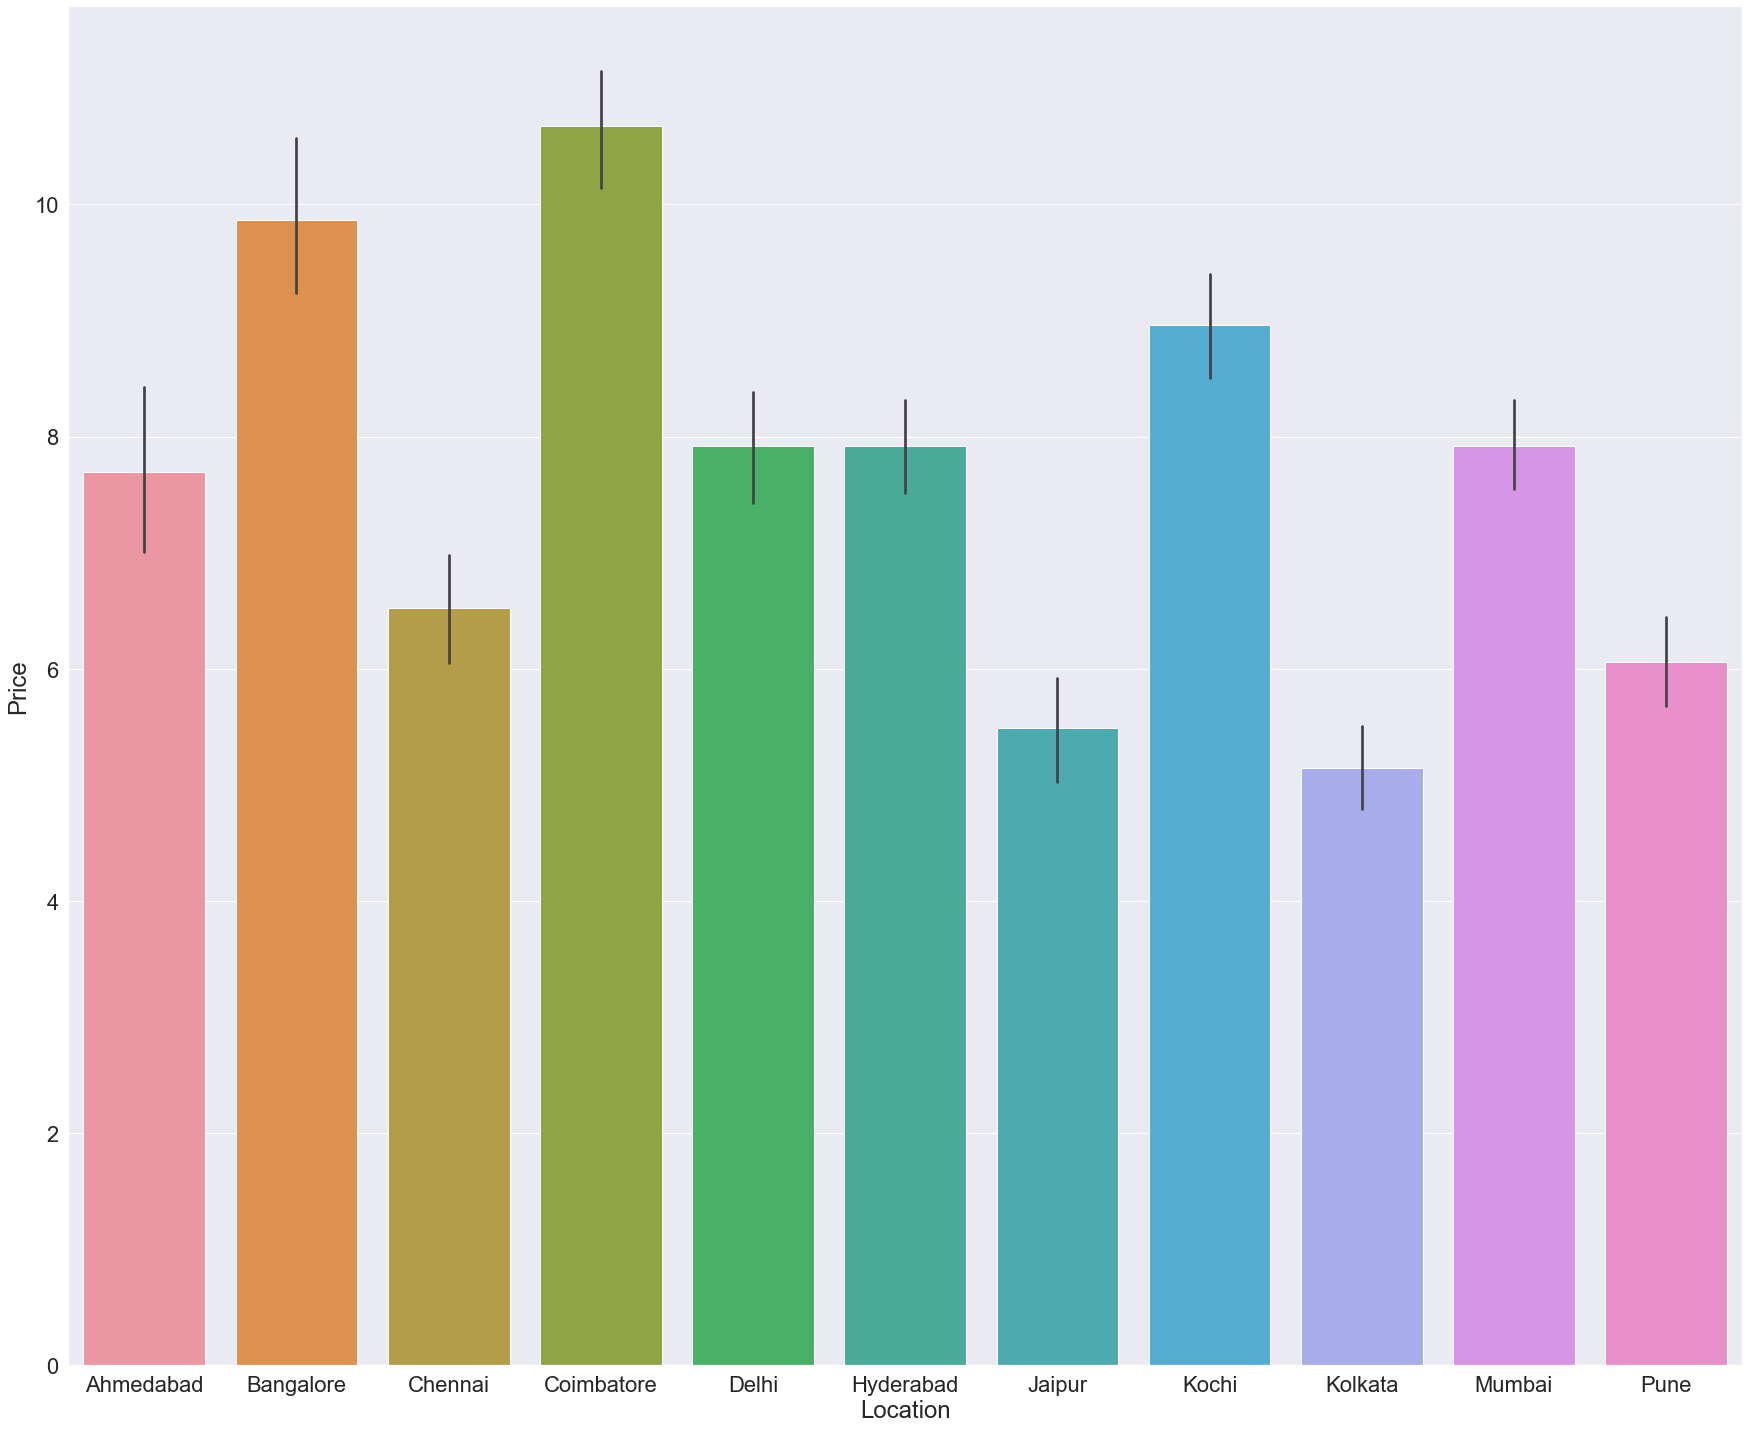

In [50]:
# price vs location
plt.figure(figsize=(30,25))
sns.barplot(x='Location',y='Price', data=cars4U)

In [51]:
# cars4U.Seats.value_counts()
cars4U['Seats']= cars4U['Seats'].replace('is_missing',0)
#cars4U['Seats']= cars4U['Seats'].replace(np.NaN,'is_missing')
cars4U['Seats']= cars4U['Seats'].astype(float)
cars4U['Seats']= cars4U['Seats'].astype(int)
print(cars4U.Seats.value_counts(dropna=False))
print(cars4U.info())

5     6047
7      796
8      170
4      119
0       54
6       38
2       18
10       8
9        3
Name: Seats, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   int64   
 10  Price              6019 non-null   float64 
 11  Brand              7253 non-null   category
 12  Car_Model          7253 non-null   object  
dtypes: category(5), float64(4), 

##### Observation : 2 seater is highest in price . 4 seater and 7 seaters are little above than average car price

In [52]:
# fixing missing Mileage. Taking the mean value by brand and substituting 0
cars4U['Seats']= cars4U['Seats'].astype(int)
print('number of records that has missing mileage before fixing ',len(cars4U[cars4U['Seats']==0]))
missing_seats = cars4U[cars4U['Seats']==0][['Brand','Car_Model', 'Seats']]
non_missing_seats =  cars4U[~(cars4U['Seats']==0)][['Brand','Car_Model', 'Seats']]
mean_value_by_brand = non_missing_seats.groupby(['Brand']).mean()
#mean_value_by_brand
for brnd in missing_seats.Brand.unique():
    mean_value = round(mean_value_by_brand.loc[brnd,'Seats'])
    cars4U.at[missing_seats[missing_seats['Brand']==brnd].index,'Seats']=mean_value

cars4U.describe().T
print('number of records that has missing mileage after fixing ',len(cars4U[cars4U['Seats']=='is_missing']))

number of records that has missing mileage before fixing  54
number of records that has missing mileage after fixing  0


# Model Building

In [53]:
print(cars4U.info())
print(cars4U.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   int64   
 10  Price              6019 non-null   float64 
 11  Brand              7253 non-null   category
 12  Car_Model          7253 non-null   object  
dtypes: category(5), float64(4), int64(3), object(1)
memory usage: 867.8+ KB
None
Price                1234
Car_Model               0
Brand                   

In [54]:
cars4U.sample(n=5)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
S.No.                                                                          
2736      Chennai  2016              31000    Diesel       Manual      First   
2885       Jaipur  2014              69000    Diesel       Manual     Second   
3434    Bangalore  2014              40000    Diesel    Automatic      First   
1358   Coimbatore  2012              49008    Petrol       Manual      First   
608    Coimbatore  2016              20967    Diesel    Automatic      First   

       Mileage  Engine    Power  Seats   Price    Brand  \
S.No.                                                     
2736     23.90  1582.0  126.200      5   9.000  hyundai   
2885     13.00  2982.0  168.500      7  19.625   toyota   
3434     17.11  1968.0  174.330      5  19.625     audi   
1358     19.70   796.0   46.300      5   2.880   maruti   
608      14.69  2993.0  232.575      5  19.625      bmw   

                              Car_Model  
S.No.                                    
2736                   Verna 1.6 CRDi S  
2885                Fortuner 4x2 Manual  
3434    A4 2.0 TDI 177 Bhp Premium Plus  
1358                           Alto LXi  
608     5 Series 2013-2017 530d M Sport

In [55]:
#Defining X and y variables
# droping the rows which has NA in Price
cars4U.drop(cars4U[cars4U.Price.isnull()].index, inplace=True)
X = cars4U.drop(['Price','Car_Model'], axis=1)
y = cars4U[['Price']]

print(X.head())
print(y.head())

         Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
S.No.                                                                          
0          Mumbai  2010              72000       CNG       Manual      First   
1            Pune  2015              41000    Diesel       Manual      First   
2         Chennai  2011              46000    Petrol       Manual      First   
3         Chennai  2012              87000    Diesel       Manual      First   
4      Coimbatore  2013              40670    Diesel    Automatic     Second   

       Mileage  Engine   Power  Seats    Brand  
S.No.                                           
0        26.60   998.0   58.16      5   maruti  
1        19.67  1582.0  126.20      5  hyundai  
2        18.20  1199.0   88.70      5    honda  
3        20.77  1248.0   88.76      7   maruti  
4        15.20  1968.0  140.80      5     audi  
       Price
S.No.       
0       1.75
1      12.50
2       4.50
3       6.00
4      17.74


In [56]:
print(X.shape)
print(y.shape)

(6019, 11)
(6019, 1)


In [57]:
#Create Dummies
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Brand'], drop_first=True)
X.head()

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  \
S.No.                                                            
0      2010              72000    26.60   998.0   58.16      5   
1      2015              41000    19.67  1582.0  126.20      5   
2      2011              46000    18.20  1199.0   88.70      5   
3      2012              87000    20.77  1248.0   88.76      7   
4      2013              40670    15.20  1968.0  140.80      5   

       Location_Bangalore  Location_Chennai  Location_Coimbatore  \
S.No.                                                              
0                       0                 0                    0   
1                       0                 0                    0   
2                       0                 1                    0   
3                       0                 1                    0   
4                       0                 0                    1   

       Location_Delhi  ...  Brand_nissan  Brand_opelcorsa  Brand_porsche  \
S.No.                  ...                                                 
0                   0  ...             0                0              0   
1                   0  ...             0                0              0   
2                   0  ...             0                0              0   
3                   0  ...             0                0              0   
4                   0  ...             0                0              0   

       Brand_renault  Brand_skoda  Brand_smart  Brand_tata  Brand_toyota  \
S.No.                                                                      
0                  0            0            0           0             0   
1                  0            0            0           0             0   
2                  0            0            0           0             0   
3                  0            0            0           0             0   
4                  0            0            0           0             0   

       Brand_volkswagen  Brand_volvo  
S.No.                                 
0                     0            0  
1                     0            0  
2                     0            0  
3                     0            0  
4                     0            0  

[5 rows x 55 columns]

In [58]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
X_train.head()

Year  Kilometers_Driven  Mileage  Engine  Power  Seats  \
S.No.                                                           
4201   2011              77000    22.07  1199.0   73.9      5   
4383   2016              19947    20.36  1197.0   78.9      5   
1779   2014              70963    15.10  2179.0  140.0      7   
4020   2013             115195    25.20  1248.0   74.0      5   
3248   2011              58752    16.47  1198.0   73.9      5   

       Location_Bangalore  Location_Chennai  Location_Coimbatore  \
S.No.                                                              
4201                    0                 0                    0   
4383                    0                 0                    0   
1779                    0                 0                    0   
4020                    0                 0                    0   
3248                    0                 0                    0   

       Location_Delhi  ...  Brand_nissan  Brand_opelcorsa  Brand_porsche  \
S.No.                  ...                                                 
4201                0  ...             0                0              0   
4383                0  ...             0                0              0   
1779                0  ...             0                0              0   
4020                0  ...             0                0              0   
3248                0  ...             0                0              0   

       Brand_renault  Brand_skoda  Brand_smart  Brand_tata  Brand_toyota  \
S.No.                                                                      
4201               0            0            0           0             0   
4383               0            0            0           0             0   
1779               0            0            0           0             0   
4020               0            0            0           0             0   
3248               0            0            0           0             0   

       Brand_volkswagen  Brand_volvo  
S.No.                                 
4201                  1            0  
4383                  0            0  
1779                  0            0  
4020                  0            0  
3248                  1            0  

[5 rows x 55 columns]

# chose model , train & Evaluate

In [60]:
#Fitting linear model
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [61]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                           Coefficients
Year                       5.713295e-01
Kilometers_Driven         -1.441483e-05
Mileage                   -1.473781e-01
Engine                     3.682997e-04
Power                      4.178238e-02
Seats                      2.699346e-01
Location_Bangalore         6.805751e-01
Location_Chennai           8.285083e-02
Location_Coimbatore        4.139046e-01
Location_Delhi            -6.357598e-01
Location_Hyderabad         5.406578e-01
Location_Jaipur            3.236960e-02
Location_Kochi            -2.492014e-01
Location_Kolkata          -1.370915e+00
Location_Mumbai           -4.483037e-01
Location_Pune             -1.004388e-01
Fuel_Type_Diesel           1.124477e+00
Fuel_Type_Electric         1.009230e+01
Fuel_Type_LPG             -2.282177e-01
Fuel_Type_Petrol          -6.710714e-01
Transmission_Manual       -1.119793e+00
Owner_Type_Fourth & Above -9.971289e-01
Owner_Type_Second         -2.709838e-01
Owner_Type_Third          -3.747872e-01


In [62]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [63]:
# Checking model performance on train set
print('Training Performance\n')
model_perf(lin_reg_model, X_train, y_train)

Training Performance



MAE       MAPE      RMSE       R^2  Adjusted R^2
0  1.337423  29.255932  1.804258  0.901393      0.900089

In [64]:
# Checking model performance on test set
print('Test Performance\n')
model_perf(lin_reg_model, X_test, y_test)

Test Performance



MAE       MAPE      RMSE       R^2  Adjusted R^2
0  1.391115  31.526394  1.929651  0.890226      0.886776

#### Observation : 
- RMSE for train and test models are 1.78 & 1.92 respectively which are almost comparable. Hence, the model is a good fit.
- 𝑅2 is 0.903, that explains ~90% of total variation in the dataset. So, overall the model is very satisfactory.

# forward feature selection

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg,k_features = X_train.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.2s finished

[2021-05-13 02:08:16] Features: 1/55 -- score: 0.6634702742048697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.3s finished

[2021-05-13 02:08:18] Features: 2/55 -- score: 0.7909046206571835[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.2s finished

[2021-05-13 02:08:19] Features: 3/55 -- score: 0.8054463280714703[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.6s finished

[2021-05-13 02:08:42] Features: 28/55 -- score: 0.8961061908633885[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s finished

[2021-05-13 02:08:43] Features: 29/55 -- score: 0.8963112984305823[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.6s finished

[2021-05-13 02:08:44] Features: 30/55 -- score: 0.8965408472301499[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished

[2021-05-13 02:08:44] Features: 31/

#### Observation : 
- We can see that the adjusted  𝑅2 starts decreasing after addition of 59th feature, so we will proceed only with best 58 features


In [75]:
reg = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(reg, k_features = 45, forward=True,
           floating=False, scoring='r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.9s finished

[2021-05-13 02:13:12] Features: 1/45 -- score: 0.6634702742048697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.9s finished

[2021-05-13 02:13:12] Features: 2/45 -- score: 0.7909046206571835[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.1s finished

[2021-05-13 02:13:14] Features: 3/45 -- score: 0.8054463280714703[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.6s finished

[2021-05-13 02:13:33] Features: 28/45 -- score: 0.8961061908633885[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.8s finished

[2021-05-13 02:13:33] Features: 29/45 -- score: 0.8963112984305823[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.6s finished

[2021-05-13 02:13:34] Features: 30/45 -- score: 0.8965408472301499[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished

[2021-05-13 02:13:35] Features: 31/

In [77]:
# select features which are important
imp_cols = list(sfs1.k_feature_idx_)
print(imp_cols)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 33, 34, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54]


In [80]:
#fit an sklearn model using these features only
X_train_final = X_train[X_train.columns[imp_cols]]

In [82]:
X_test.columns
X_train_final.shape

(4213, 45)

In [85]:
X_test_final = X_test[X_train_final.columns]

In [87]:
#Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_), \
                       index=X_train_final.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model2, X_train_final, y_train))

                           Coefficients
Year                       5.737745e-01
Kilometers_Driven         -1.467858e-05
Mileage                   -1.478440e-01
Engine                     4.090305e-04
Power                      4.211926e-02
Seats                      2.353294e-01
Location_Bangalore         6.814821e-01
Location_Coimbatore        4.244697e-01
Location_Delhi            -5.982272e-01
Location_Hyderabad         5.610216e-01
Location_Kochi            -2.368917e-01
Location_Kolkata          -1.349742e+00
Location_Mumbai           -4.358162e-01
Fuel_Type_Diesel           1.178517e+00
Fuel_Type_Electric         1.027647e+01
Fuel_Type_Petrol          -6.229720e-01
Transmission_Manual       -1.130877e+00
Owner_Type_Fourth & Above -9.933031e-01
Owner_Type_Second         -2.527016e-01
Brand_audi                 5.295391e+00
Brand_bentley              4.642065e-12
Brand_bmw                  4.438026e+00
Brand_chevrolet           -1.385220e+00
Brand_datsun              -1.839123e+00


In [84]:
# model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model2, X_test_final, y_test))

Test Performance



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 45 is different from 55)

# Observations and Conclusion

####  
- Better prices are there for latest year of manufacturing.
- prices are high for low number of kilometers driven
- Price increases for more engine capacity and power.
- Electric and diesel type has better prices compared to other types.
- Manual transmission cars has lesser price compared to automatic transmission.
- Ahmedabad has less sales compared to other locations
- prices are higher for Owner type First & second.
- 5 seater & 7 seaters were sold more. But 2 seater is at highest in price and 4 seater and 7 seaters are little above than average car price
- brands Audi, bentley, bmw, isuzu, jaguar, jeep, lombargini, Land rover,Mercides porsche, volvo has high price
- brands Chevi, Datsun, Fiat, Force ,ford, honda, Hyundai, Mahindra, Maruthi, NissanRenolt, Skoda, Smart, Tata & Volkswagen are little below avarage car price.
- Brands Ambassador, Hindustan , OpelCorsa are cheapest in price.

- Both $R^2$ score and RMSE show that the model fitted is good.


In [73]:
cars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   int64   
 10  Price              6019 non-null   float64 
 11  Brand              6019 non-null   category
 12  Car_Model          6019 non-null   object  
dtypes: category(5), float64(4), int64(3), object(1)
memory usage: 455.0+ KB


In [74]:
print(cars4U.Seats.value_counts(dropna=False))

5     5056
7      674
8      134
4       99
6       32
2       16
10       5
9        3
Name: Seats, dtype: int64
